# <center>Análisis Complejidad Electoral 2019: Municipios <center>
## <center>Análisis Exploratorio y Construcción Índices de Complejidad Electoral <center>

<br>

#### <center>INFOTEC-Maestría en Ciencia de Datos e Información <center>
#### <center>Autor: Miguel David Alvarez Hernández (mdalvarezh@gmail.com)<center>

In [1]:
import datetime
now = datetime.datetime.now()
print ("Última versión:")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Última versión:
2020-07-27 12:28:47


# Setup

In [2]:
import pandas as pd  
import numpy as np
import pandas_profiling
from itertools import combinations 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px

# Importación de datos procesados

In [3]:
#datos procesados
datos = pd.read_csv("C:/Users/miguel.alvarez/Google Drive/INFOTEC/Proyecto/Code-Data/Mun/1_Procesamiento/Resultados_Datos-procesados_mun2019.csv", encoding='utf-8')

In [4]:
print(datos.dtypes)
datos

EDO                   int64
NOMBRE_ESTADO        object
MUN                   int64
NOMBRE_MUNICIPIO     object
Coef_Var_PE         float64
Coef_Var_LNE        float64
Var_Prop_PE         float64
Var_Prop_LNE        float64
Autocorr_PE         float64
Autocorr_LNE        float64
Razon_LNE_PE        float64
PE                  float64
LNE                 float64
TC_LNE_2019         float64
NUM_SECC_RUR          int64
Area_Km2            float64
Densidad_LNE        float64
dtype: object


EDO   NOMBRE_ESTADO  MUN              NOMBRE_MUNICIPIO  Coef_Var_PE  \
0       1  AGUASCALIENTES   10     SAN FRANCISCO DE LOS ROMO     0.017131   
1       1  AGUASCALIENTES    8            SAN JOSE DE GRACIA     0.005040   
2       1  AGUASCALIENTES    9                      TEPEZALA     0.006879   
3       1  AGUASCALIENTES   11                      EL LLANO     0.008917   
4       1  AGUASCALIENTES    2                      ASIENTOS     0.008083   
...   ...             ...  ...                           ...          ...   
2451   32       ZACATECAS   45                   TEPECHITLAN     0.014994   
2452   32       ZACATECAS   14  GENERAL FRANCISCO R. MURGUIA     0.019415   
2453   32       ZACATECAS   44                       TABASCO     0.027363   
2454   32       ZACATECAS    9                 CHALCHIHUITES     0.016451   
2455   32       ZACATECAS   11  TRINIDAD GARCIA DE LA CADENA     0.029054   

      Coef_Var_LNE  Var_Prop_PE  Var_Prop_LNE  Autocorr_PE  Autocorr_LNE  \
0         0.015085     0.020041      0.017733     0.965775      0.755939   
1         0.008345     0.005584      0.008887     0.435676      0.237061   
2         0.011777     0.007903      0.011921     0.605737      0.344567   
3         0.012239     0.009983      0.014232     0.585621      0.504020   
4         0.013432     0.009252      0.015397     0.581193      0.374738   
...            ...          ...           ...          ...           ...   
2451      0.019408     0.017748      0.021905     0.987834      0.959378   
2452      0.022769     0.022931      0.026072     0.964977      0.984897   
2453      0.029823     0.032716      0.035416     0.992677      0.993335   
2454      0.021097     0.019649      0.024771     0.975279      0.988608   
2455      0.035958     0.033702      0.041745     0.969271      0.960965   

      Razon_LNE_PE       PE      LNE  TC_LNE_2019  NUM_SECC_RUR   Area_Km2  \
0         0.989272  35518.0  34917.0     0.037498             3   9.791576   
1         0.991803   7004.0   6914.0     0.000289             4   3.241104   
2         0.990635  15733.0  15545.0     0.005108             6   6.271495   
3         0.991016  15298.0  15067.0    -0.003373             6  10.006312   
4         0.989080  34722.0  34222.0     0.001874            11  23.049424   
...            ...      ...      ...          ...           ...        ...   
2451      0.983523   7061.0   6959.0     0.066677            13  13.507234   
2452      0.986450  17610.0  17372.0     0.082705            32  17.129462   
2453      0.983221  12689.0  12527.0     0.100307            16   8.620183   
2454      0.982861   8339.0   8222.0     0.075052            10  13.707054   
2455      0.972699   2853.0   2779.0     0.113381             3   4.636403   

      Densidad_LNE  
0      3566.024547  
1      2133.223463  
2      2478.675412  
3      1505.749552  
4      1484.722551  
...            ...  
2451    515.205401  
2452   1014.159112  
2453   1453.217492  
2454    599.837116  
2455    599.387128  

[2456 rows x 17 columns]

In [5]:
#se reordena y eliminan del dataframe las variables que no se usarán
datos_mun = datos.drop(columns=['Coef_Var_PE', 'Var_Prop_PE', 'Autocorr_PE','Area_Km2'])
datos_mun = datos_mun.reindex(columns= ['EDO','NOMBRE_ESTADO','MUN','NOMBRE_MUNICIPIO','NUM_SECC_RUR','LNE','Densidad_LNE','Razon_LNE_PE','TC_LNE_2019','Coef_Var_LNE','Var_Prop_LNE','Autocorr_LNE'])

#verificar si hay valores nulos en datos_mun
datos_mun.isnull().sum()

EDO                 0
NOMBRE_ESTADO       0
MUN                 0
NOMBRE_MUNICIPIO    0
NUM_SECC_RUR        0
LNE                 0
Densidad_LNE        0
Razon_LNE_PE        0
TC_LNE_2019         0
Coef_Var_LNE        0
Var_Prop_LNE        0
Autocorr_LNE        0
dtype: int64

In [6]:
#se eliminan las filas (municipios) con valores vacíos
datos_mun_limpio = datos_mun.dropna()
datos_mun_limpio = datos_mun_limpio.reset_index(drop=True) #para reordenar el índice del nuevo dataframe
datos_mun_limpio.isnull().sum()

EDO                 0
NOMBRE_ESTADO       0
MUN                 0
NOMBRE_MUNICIPIO    0
NUM_SECC_RUR        0
LNE                 0
Densidad_LNE        0
Razon_LNE_PE        0
TC_LNE_2019         0
Coef_Var_LNE        0
Var_Prop_LNE        0
Autocorr_LNE        0
dtype: int64

In [7]:
#se separan los indicadores de los metadatos 

#metadatos
metadatos = datos_mun_limpio[['EDO', 'NOMBRE_ESTADO', 'MUN', 'NOMBRE_MUNICIPIO']]
metadatos.head()

#indicadores (features)
datos_mun_limpio_f = datos_mun_limpio[['NUM_SECC_RUR','LNE', 'Densidad_LNE', 'Razon_LNE_PE', 'TC_LNE_2019', 'Coef_Var_LNE', 'Var_Prop_LNE','Autocorr_LNE']]
datos_mun_limpio_f

NUM_SECC_RUR      LNE  Densidad_LNE  Razon_LNE_PE  TC_LNE_2019  \
0                3  34917.0   3566.024547      0.989272     0.037498   
1                4   6914.0   2133.223463      0.991803     0.000289   
2                6  15545.0   2478.675412      0.990635     0.005108   
3                6  15067.0   1505.749552      0.991016    -0.003373   
4               11  34222.0   1484.722551      0.989080     0.001874   
...            ...      ...           ...           ...          ...   
2451            13   6959.0    515.205401      0.983523     0.066677   
2452            32  17372.0   1014.159112      0.986450     0.082705   
2453            16  12527.0   1453.217492      0.983221     0.100307   
2454            10   8222.0    599.837116      0.982861     0.075052   
2455             3   2779.0    599.387128      0.972699     0.113381   

      Coef_Var_LNE  Var_Prop_LNE  Autocorr_LNE  
0         0.015085      0.017733      0.755939  
1         0.008345      0.008887      0.237061  
2         0.011777      0.011921      0.344567  
3         0.012239      0.014232      0.504020  
4         0.013432      0.015397      0.374738  
...            ...           ...           ...  
2451      0.019408      0.021905      0.959378  
2452      0.022769      0.026072      0.984897  
2453      0.029823      0.035416      0.993335  
2454      0.021097      0.024771      0.988608  
2455      0.035958      0.041745      0.960965  

[2456 rows x 8 columns]

## Análisis exploratorio de los indicadores base (sin transformar)

In [8]:
#resumen estadístico
datos_mun_limpio_f.describe()

NUM_SECC_RUR           LNE  Densidad_LNE  Razon_LNE_PE  TC_LNE_2019  \
count   2456.000000  2.456000e+03   2456.000000   2456.000000  2456.000000   
mean       7.706433  3.668821e+04   2565.168835      0.985808     0.052851   
std       11.298817  1.091530e+05   3974.170528      0.005721     0.037313   
min        0.000000  6.100000e+01     29.384334      0.933182    -0.250000   
25%        1.000000  3.297750e+03    968.432244      0.984141     0.033463   
50%        4.000000  9.673500e+03   1685.862186      0.987232     0.056462   
75%       10.000000  2.454125e+04   2837.315869      0.989110     0.074967   
max      149.000000  1.463720e+06  71935.167394      0.997168     0.275049   

       Coef_Var_LNE  Var_Prop_LNE  Autocorr_LNE  
count   2456.000000   2456.000000   2456.000000  
mean       0.020297      0.023629      0.857128  
std        0.008433      0.009548      0.214445  
min        0.002178      0.002555     -0.376887  
25%        0.014870      0.017206      0.837568  
50%        0.019369      0.022695      0.964981  
75%        0.024503      0.028865      0.988240  
max        0.098169      0.084949      0.998982

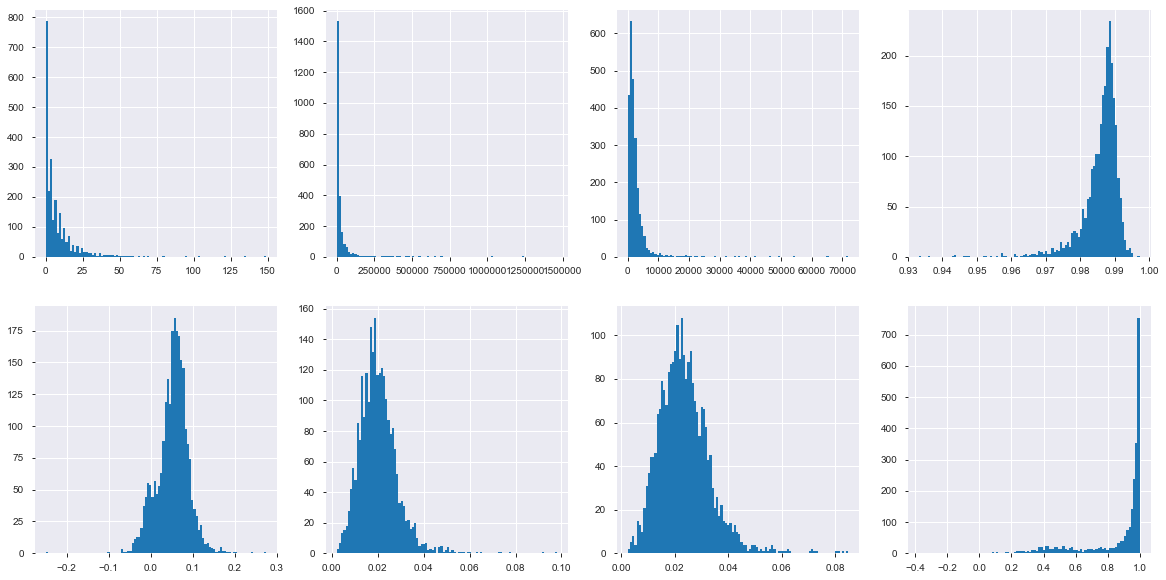

In [9]:
#histogramas de los indicadores base 
#print(sum(datos_mun['LNE'] > 500000))
plt.figure(figsize=(20,10)) 

plt.subplot(241)
H = plt.hist(datos_mun_limpio_f['NUM_SECC_RUR'], bins = 100)
plt.subplot(242)
H = plt.hist(datos_mun_limpio_f['LNE'], bins = 100)
plt.subplot(243)
H = plt.hist(datos_mun_limpio_f['Densidad_LNE'], bins = 100)
plt.subplot(244)
H = plt.hist(datos_mun_limpio_f['Razon_LNE_PE'], bins = 100)
plt.subplot(245)
H = plt.hist(datos_mun_limpio_f['TC_LNE_2019'], bins = 100)
plt.subplot(246)
H = plt.hist(datos_mun_limpio_f['Coef_Var_LNE'], bins = 100)
plt.subplot(247)
H = plt.hist(datos_mun_limpio_f['Var_Prop_LNE'], bins = 100)
plt.subplot(248)
H = plt.hist(datos_mun_limpio_f['Autocorr_LNE'], bins = 100)

<br>

## Gráficas (heatmap y pair-plot) y análisis de correlación

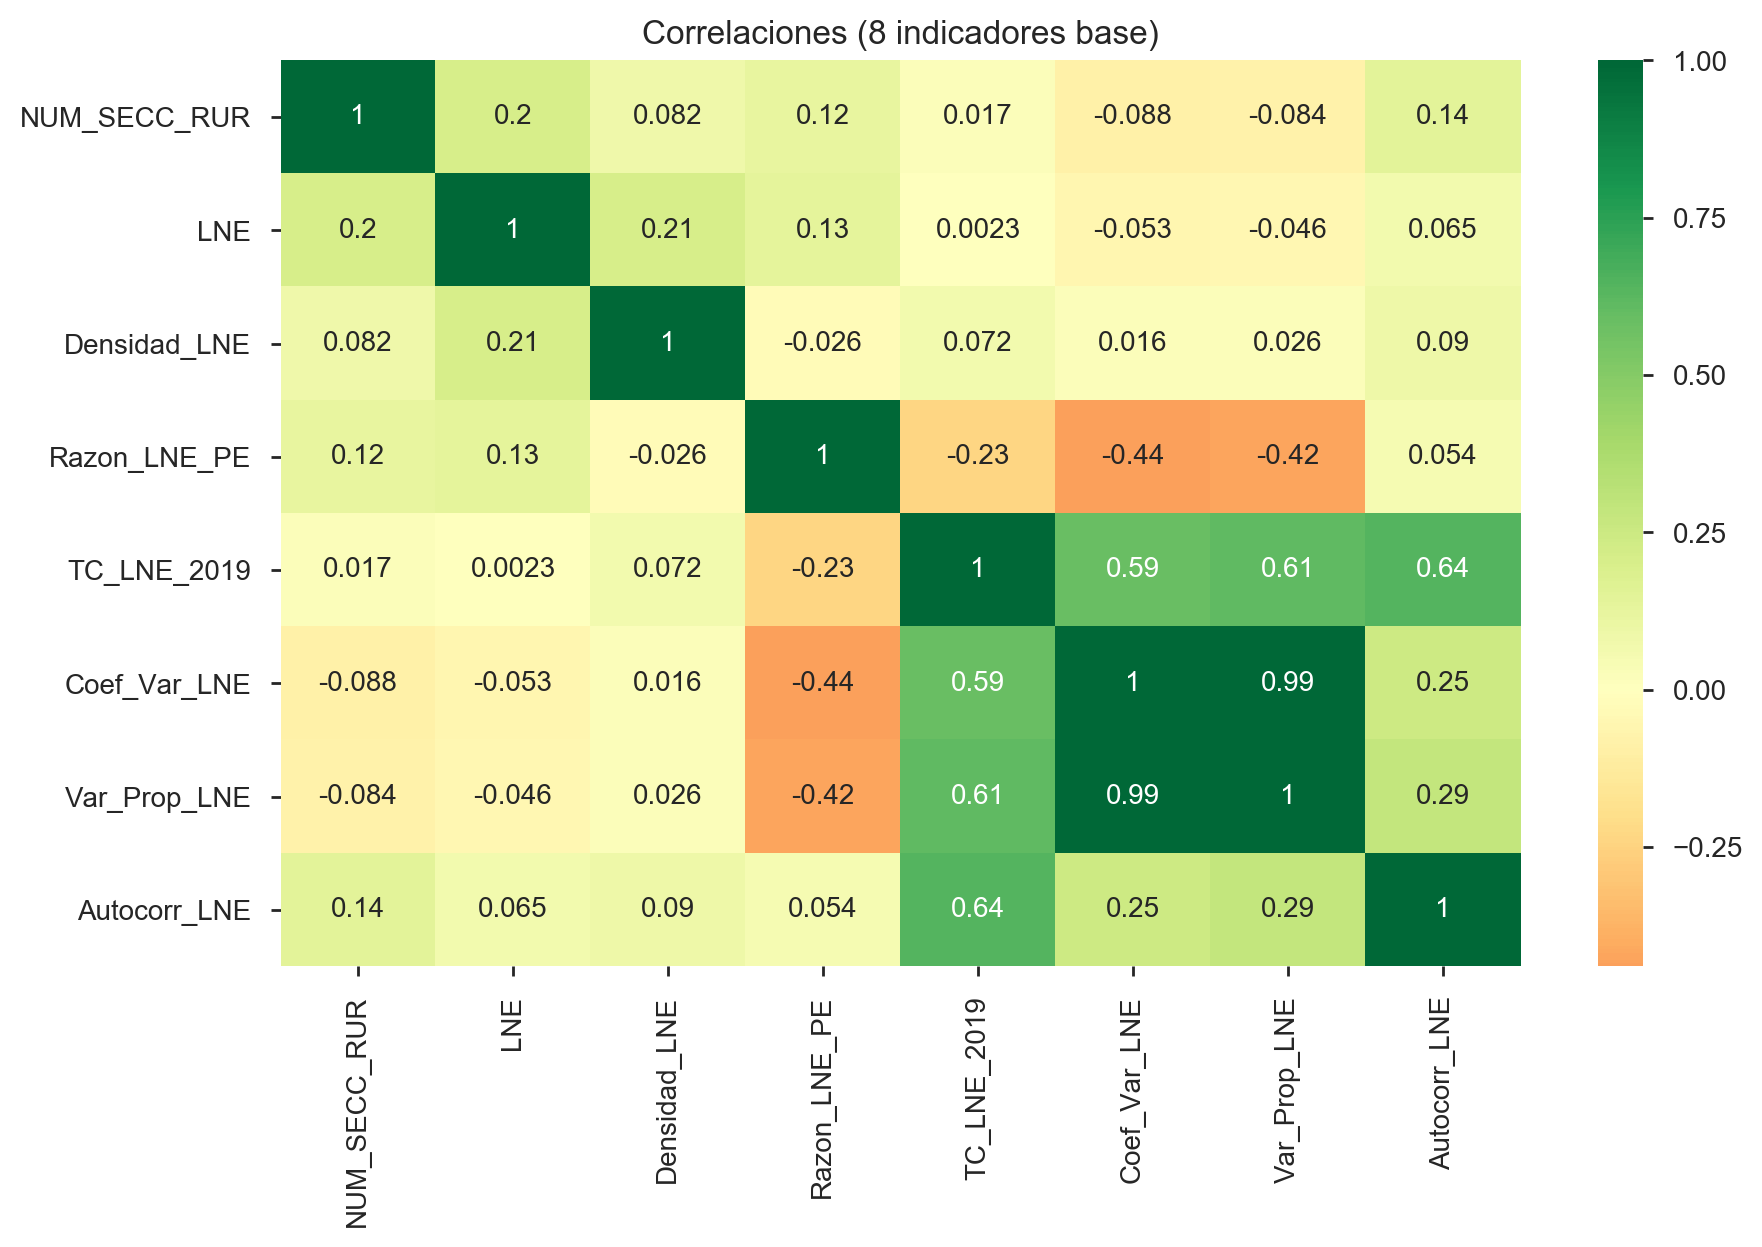

In [10]:
#Plot correlogram
#(see https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

plt.figure(figsize=(10,6), dpi= 200)
sns.heatmap(datos_mun_limpio_f.corr(), xticklabels=datos_mun_limpio_f.corr().columns, yticklabels=datos_mun_limpio_f.corr().columns, cmap='RdYlGn', center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz (see https://github.com/mwaskom/seaborn/issues/1773)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Correlaciones (8 indicadores base)')

#se guarda la grafica
plt.savefig('Pyplot_heatmap_ind8.png',dpi=600, bbox_inches="tight")
plt.show() 

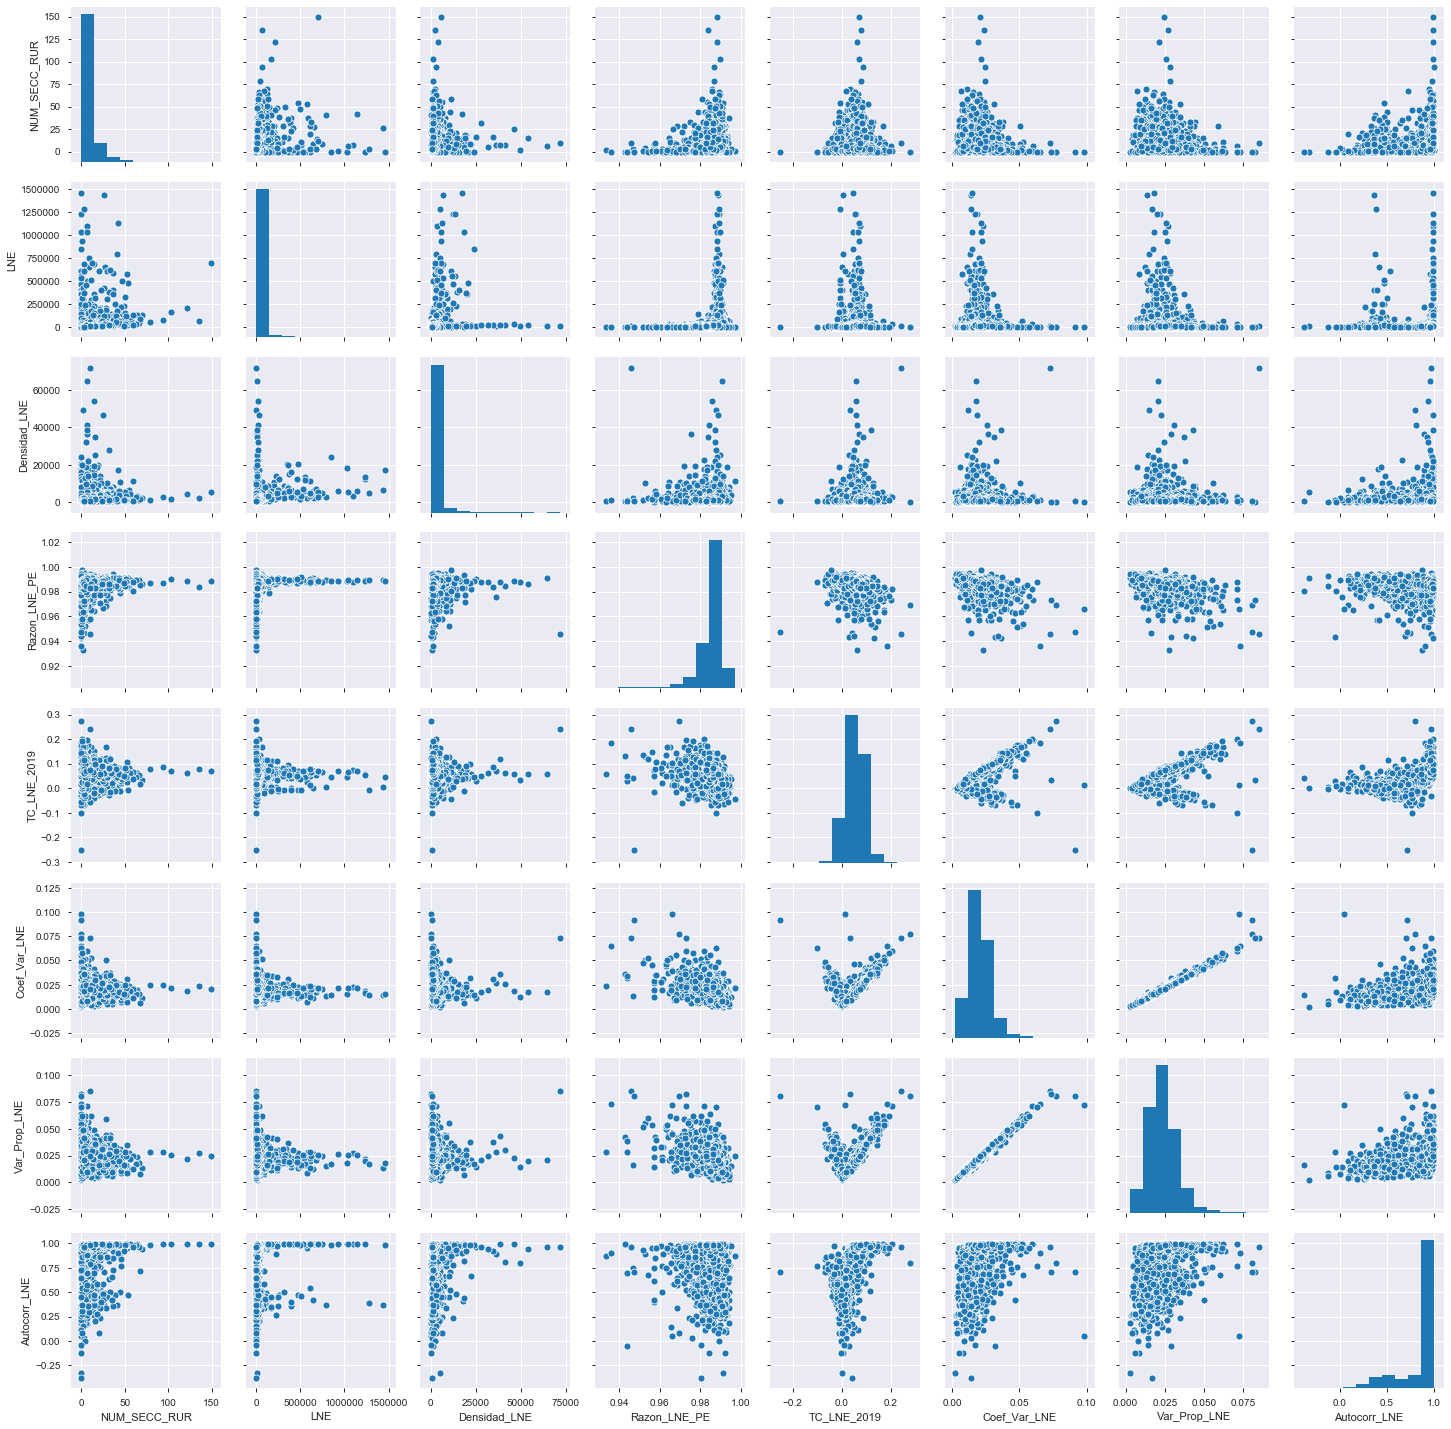

In [11]:
#pair-plot
#(see https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)
corr1 = sns.pairplot(datos_mun_limpio_f)
corr1.savefig('Pyplot_correlogram_ind8.png',dpi=600)

<br>

## Análisis exploratorio de los indicadores base (transformación log)

In [12]:
#se transforman algunos indicadores para analizar escenarios
datos_mun_limpio_f_tf = datos_mun_limpio_f.copy()

#np-log de LNE, Densidad
datos_mun_limpio_f_tf['LNE'] = np.log(datos_mun_limpio_f_tf['LNE'])
datos_mun_limpio_f_tf['Densidad_LNE'] = np.log(datos_mun_limpio_f_tf['Densidad_LNE'])
#datos_mun_limpio_f_tf['NUM_SECC_RUR'] = np.log(datos_mun_limpio_f_tf['NUM_SECC_RUR']+1)

#renombramos algunas columnas
datos_mun_limpio_f_tf=datos_mun_limpio_f_tf.rename(columns={"LNE": "log(LNE)", "Densidad_LNE": "log(Densidad_LNE)"})

#resumen estadístico
datos_mun_limpio_f_tf.describe()

NUM_SECC_RUR     log(LNE)  log(Densidad_LNE)  Razon_LNE_PE  \
count   2456.000000  2456.000000        2456.000000   2456.000000   
mean       7.706433     9.163902           7.397130      0.985808   
std       11.298817     1.562565           0.924182      0.005721   
min        0.000000     4.110874           3.380462      0.933182   
25%        1.000000     8.100996           6.875678      0.984141   
50%        4.000000     9.177145           7.430032      0.987232   
75%       10.000000    10.108110           7.950614      0.989110   
max      149.000000    14.196492          11.183521      0.997168   

       TC_LNE_2019  Coef_Var_LNE  Var_Prop_LNE  Autocorr_LNE  
count  2456.000000   2456.000000   2456.000000   2456.000000  
mean      0.052851      0.020297      0.023629      0.857128  
std       0.037313      0.008433      0.009548      0.214445  
min      -0.250000      0.002178      0.002555     -0.376887  
25%       0.033463      0.014870      0.017206      0.837568  
50%       0.056462      0.019369      0.022695      0.964981  
75%       0.074967      0.024503      0.028865      0.988240  
max       0.275049      0.098169      0.084949      0.998982

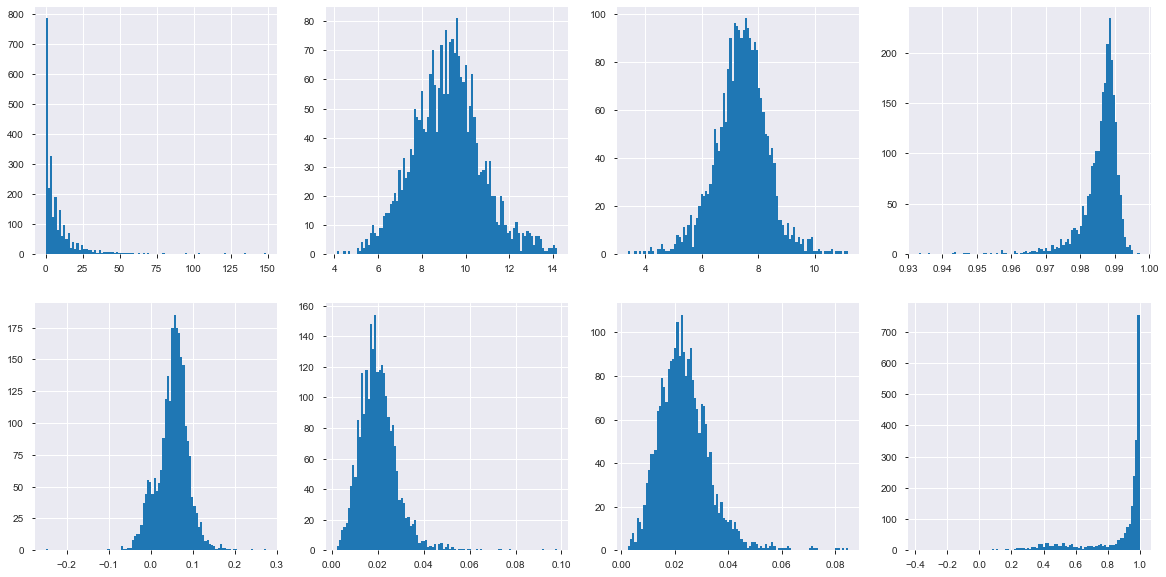

In [13]:
#histogramas de los indicadores base 
#print(sum(datos_mun['log(LNE')] > 500000))
plt.figure(figsize=(20,10)) 

plt.subplot(241)
H = plt.hist(datos_mun_limpio_f_tf['NUM_SECC_RUR'], bins = 100)
plt.subplot(242)
H = plt.hist(datos_mun_limpio_f_tf['log(LNE)'], bins = 100)
plt.subplot(243)
H = plt.hist(datos_mun_limpio_f_tf['log(Densidad_LNE)'], bins = 100)
plt.subplot(244)
H = plt.hist(datos_mun_limpio_f_tf['Razon_LNE_PE'], bins = 100)
plt.subplot(245)
H = plt.hist(datos_mun_limpio_f_tf['TC_LNE_2019'], bins = 100)
plt.subplot(246)
H = plt.hist(datos_mun_limpio_f_tf['Coef_Var_LNE'], bins = 100)
plt.subplot(247)
H = plt.hist(datos_mun_limpio_f_tf['Var_Prop_LNE'], bins = 100)
plt.subplot(248)
H = plt.hist(datos_mun_limpio_f_tf['Autocorr_LNE'], bins = 100)

<br>

## Gráficas (heatmap y pair-plot) y análisis de correlación

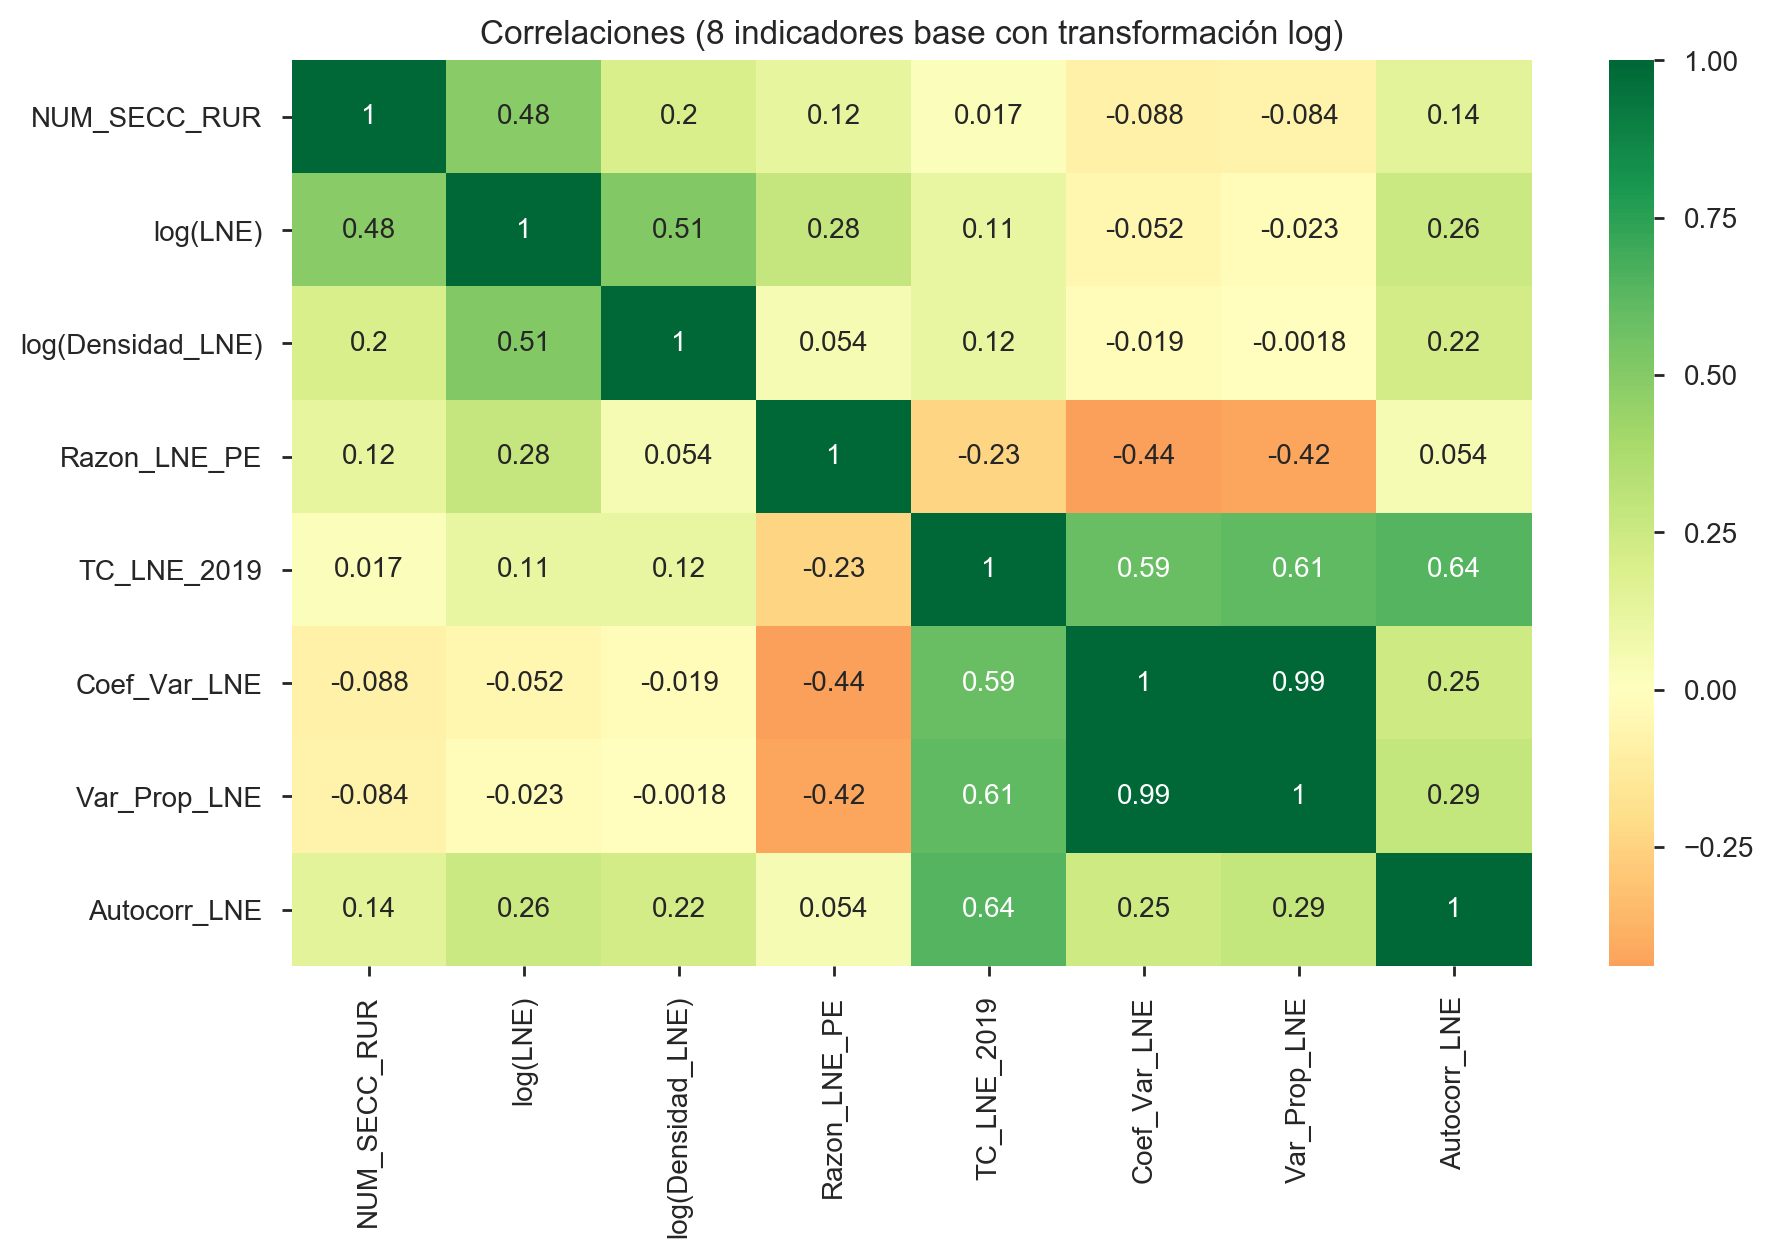

In [14]:
#Plot correlogram
#(see https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

plt.figure(figsize=(10,6), dpi= 200)
sns.heatmap(datos_mun_limpio_f_tf.corr(), xticklabels=datos_mun_limpio_f_tf.corr().columns, yticklabels=datos_mun_limpio_f_tf.corr().columns, cmap='RdYlGn', center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz (see https://github.com/mwaskom/seaborn/issues/1773)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Correlaciones (8 indicadores base con transformación log)')

#se guarda la grafica
plt.savefig('Pyplot_heatmap_ind8_tf.png',dpi=600,bbox_inches="tight")
plt.show() 

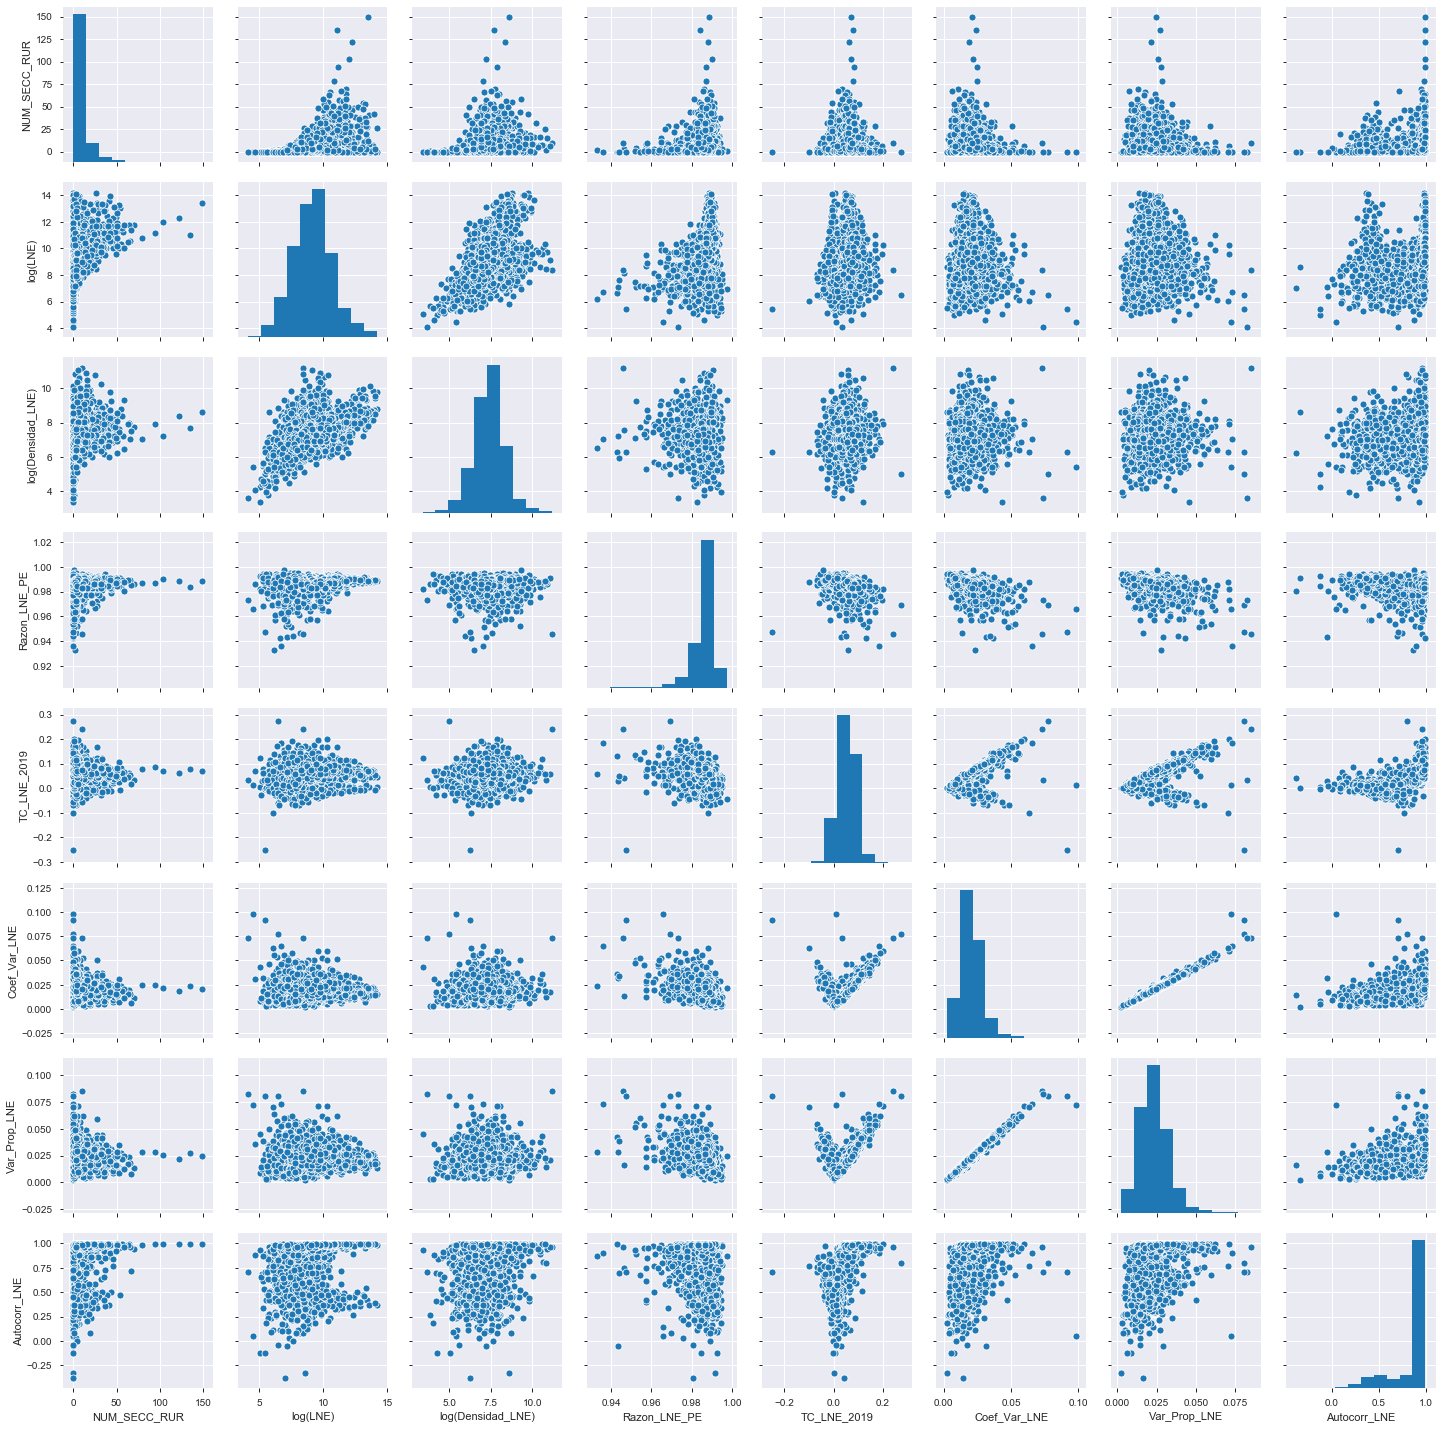

In [15]:
#pair-plot
#(see https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)
corr1_tf = sns.pairplot(datos_mun_limpio_f_tf)
corr1_tf.savefig('Pyplot_correlogram_ind8_tf.png',dpi=600)

<br>

# Análisis de Componentes Principales (PCA)

### Preprocesamiento de datos

In [16]:
from sklearn.preprocessing import StandardScaler

#Se crean listas para separar los tipos/escenarios de datos

#seleccionamos 7 indicadores
ind7 = ['NUM_SECC_RUR','LNE', 'Densidad_LNE', 'Razon_LNE_PE', 'TC_LNE_2019', 'Coef_Var_LNE', 'Autocorr_LNE']

#seleccionamos 8 indicadores
ind8 = ['NUM_SECC_RUR','LNE', 'Densidad_LNE', 'Razon_LNE_PE', 'TC_LNE_2019', 'Coef_Var_LNE', 'Var_Prop_LNE', 'Autocorr_LNE']

#seleccionamos 8 indicadores (con log)
ind8_tf = ['NUM_SECC_RUR','log(LNE)', 'log(Densidad_LNE)', 'Razon_LNE_PE', 'TC_LNE_2019', 'Coef_Var_LNE', 'Var_Prop_LNE', 'Autocorr_LNE']

#etiquetas
labels = ['EDO', 'NOMBRE_ESTADO', 'MUN', 'NOMBRE_MUNICIPIO']


#seleccionamos los valores de solo 7 indicadores (sin Var_Prop_LNE)
x = datos_mun_limpio_f.loc[:, ind7].values

#seleccionamos los valores de los 8 indicadores originales
x2 = datos_mun_limpio_f.loc[:, ind8].values

#seleccionamos los valores de los 8 indicadores con transformacion log en LNE y Densidad
x3 = datos_mun_limpio_f_tf.loc[:, ind8_tf].values

#seleccionamos las labels (metadatos)
y = metadatos.loc[:,labels].values

print(x.shape)
print(x2.shape)
print(x3.shape)
print(y.shape)

(2456, 7)
(2456, 8)
(2456, 8)
(2456, 4)


In [17]:
#para verificar que no haya valores nulos o infinitos en ind7
print(np.any(np.isnan(x)))
print(np.all(np.isfinite(x)))

#para verificar que no haya valores nulos o infinitos en ind8
print(np.any(np.isnan(x2)))
print(np.all(np.isfinite(x2)))

#para verificar que no haya valores nulos o infinitos en ind8_tf
print(np.any(np.isnan(x3)))
print(np.all(np.isfinite(x3)))

False
True
False
True
False
True


In [18]:
#Estandarizamos los valores de ind7 (normalización)
x = StandardScaler().fit_transform(x)
print(x.shape)

#Estandarizamos los valores de ind8 (normalización)
x2 = StandardScaler().fit_transform(x2)
print(x2.shape)

#Estandarizamos los valores de ind8_tf (normalización)
x3 = StandardScaler().fit_transform(x3)
print(x3.shape)

(2456, 7)
(2456, 8)
(2456, 8)


<br>

## PCA con 7 indicadores

In [19]:
from sklearn.decomposition import PCA

#calculo de PCA (con las 7 componentes totales), y obtención de los valores CP para cada municipio
pca_7cp = PCA(n_components=7)
pca_ind7 = pca_7cp.fit_transform(x)

#razones de varianza explicada por cada CP 
print('Razón de varianza explicada por cada CP (n_components=3): %s'
      % str(pca_7cp.explained_variance_ratio_))

#dataframe con los valores de los 7 CP por municipio
df_pca_ind7 = pd.DataFrame(data = pca_ind7
             , columns = ['CP1', 'CP2', 'CP3','CP4', 'CP5', 'CP6','CP7'])
df_pca_ind7

Razón de varianza explicada por cada CP (n_components=3): [0.30447296 0.21467388 0.15110707 0.12154551 0.10757122 0.06580946
 0.0348199 ]


CP1       CP2       CP3       CP4       CP5       CP6       CP7
0    -0.977398  0.028042  0.063097 -0.606314 -0.008890  0.125724 -0.186441
1    -3.305609 -0.809967  0.532808 -0.047750 -0.023314  0.850008 -1.029154
2    -2.703711 -0.620490  0.542320  0.068364 -0.057031  0.809700 -0.703313
3    -2.515591 -0.453120  0.098471  0.009010  0.012804  0.548283 -0.124460
4    -2.526716 -0.502715  0.527982  0.636861  0.018323  0.718382 -0.491248
...        ...       ...       ...       ...       ...       ...       ...
2451  0.474839 -0.023246 -0.549936  0.546248 -0.199900 -0.472914 -0.071207
2452  0.839216  1.142958 -0.860098  1.574717 -0.746442  0.231823 -0.248003
2453  1.811809  0.107685 -0.395599  0.746232 -0.167810  0.308384 -0.195661
2454  0.826509 -0.159580 -0.518258  0.361126 -0.074305 -0.489058 -0.079668
2455  2.945426 -1.511420  0.506955  0.771488  0.332752 -0.371937 -0.151723

[2456 rows x 7 columns]

In [20]:
#obtención de los pesos por cada variable
pca_pesos_ind7 = pca_7cp.components_
print(pca_pesos_ind7)

#transformación a un dataframe:
df_pca_pesos_ind7 = pd.DataFrame(pca_pesos_ind7, columns=ind7)
principal_components_pesos = pd.DataFrame(['CP1', 'CP2', 'CP3','CP4', 'CP5', 'CP6','CP7'])
df_pca_pesos_ind7.insert(0, 'Componentes Principales', principal_components_pesos)

#se guarda el último dataframe en un csv
df_pca_pesos_ind7.to_csv(r'Resultados_Mun_PCA_pesos_ind7.csv', index = None)

df_pca_pesos_ind7=df_pca_pesos_ind7.set_index('Componentes Principales')
df_pca_pesos_ind7

[[-0.0094399  -0.02195796  0.08598414 -0.32319219  0.61512156  0.54740919
   0.45776732]
 [ 0.50752461  0.52650158  0.35190477  0.40941701  0.10344052 -0.19541827
   0.35336576]
 [-0.07480004  0.36865871  0.64765623 -0.4748793  -0.16759638  0.15552595
  -0.40155934]
 [ 0.75436985  0.09117518 -0.44318825 -0.37327637 -0.08961742  0.15970582
  -0.23092187]
 [-0.39489783  0.75191186 -0.49232858  0.07138466  0.03894368  0.15749138
  -0.06986356]
 [ 0.10430322 -0.11276152  0.10242569  0.59700025  0.01775946  0.66090865
  -0.41519841]
 [-0.02893577 -0.00227537  0.00410911 -0.03967194 -0.75695026  0.38840292
   0.52319812]]


NUM_SECC_RUR       LNE  Densidad_LNE  Razon_LNE_PE  \
Componentes Principales                                                       
CP1                         -0.009440 -0.021958      0.085984     -0.323192   
CP2                          0.507525  0.526502      0.351905      0.409417   
CP3                         -0.074800  0.368659      0.647656     -0.474879   
CP4                          0.754370  0.091175     -0.443188     -0.373276   
CP5                         -0.394898  0.751912     -0.492329      0.071385   
CP6                          0.104303 -0.112762      0.102426      0.597000   
CP7                         -0.028936 -0.002275      0.004109     -0.039672   

                         TC_LNE_2019  Coef_Var_LNE  Autocorr_LNE  
Componentes Principales                                           
CP1                         0.615122      0.547409      0.457767  
CP2                         0.103441     -0.195418      0.353366  
CP3                        -0.167596      0.155526     -0.401559  
CP4                        -0.089617      0.159706     -0.230922  
CP5                         0.038944      0.157491     -0.069864  
CP6                         0.017759      0.660909     -0.415198  
CP7                        -0.756950      0.388403      0.523198

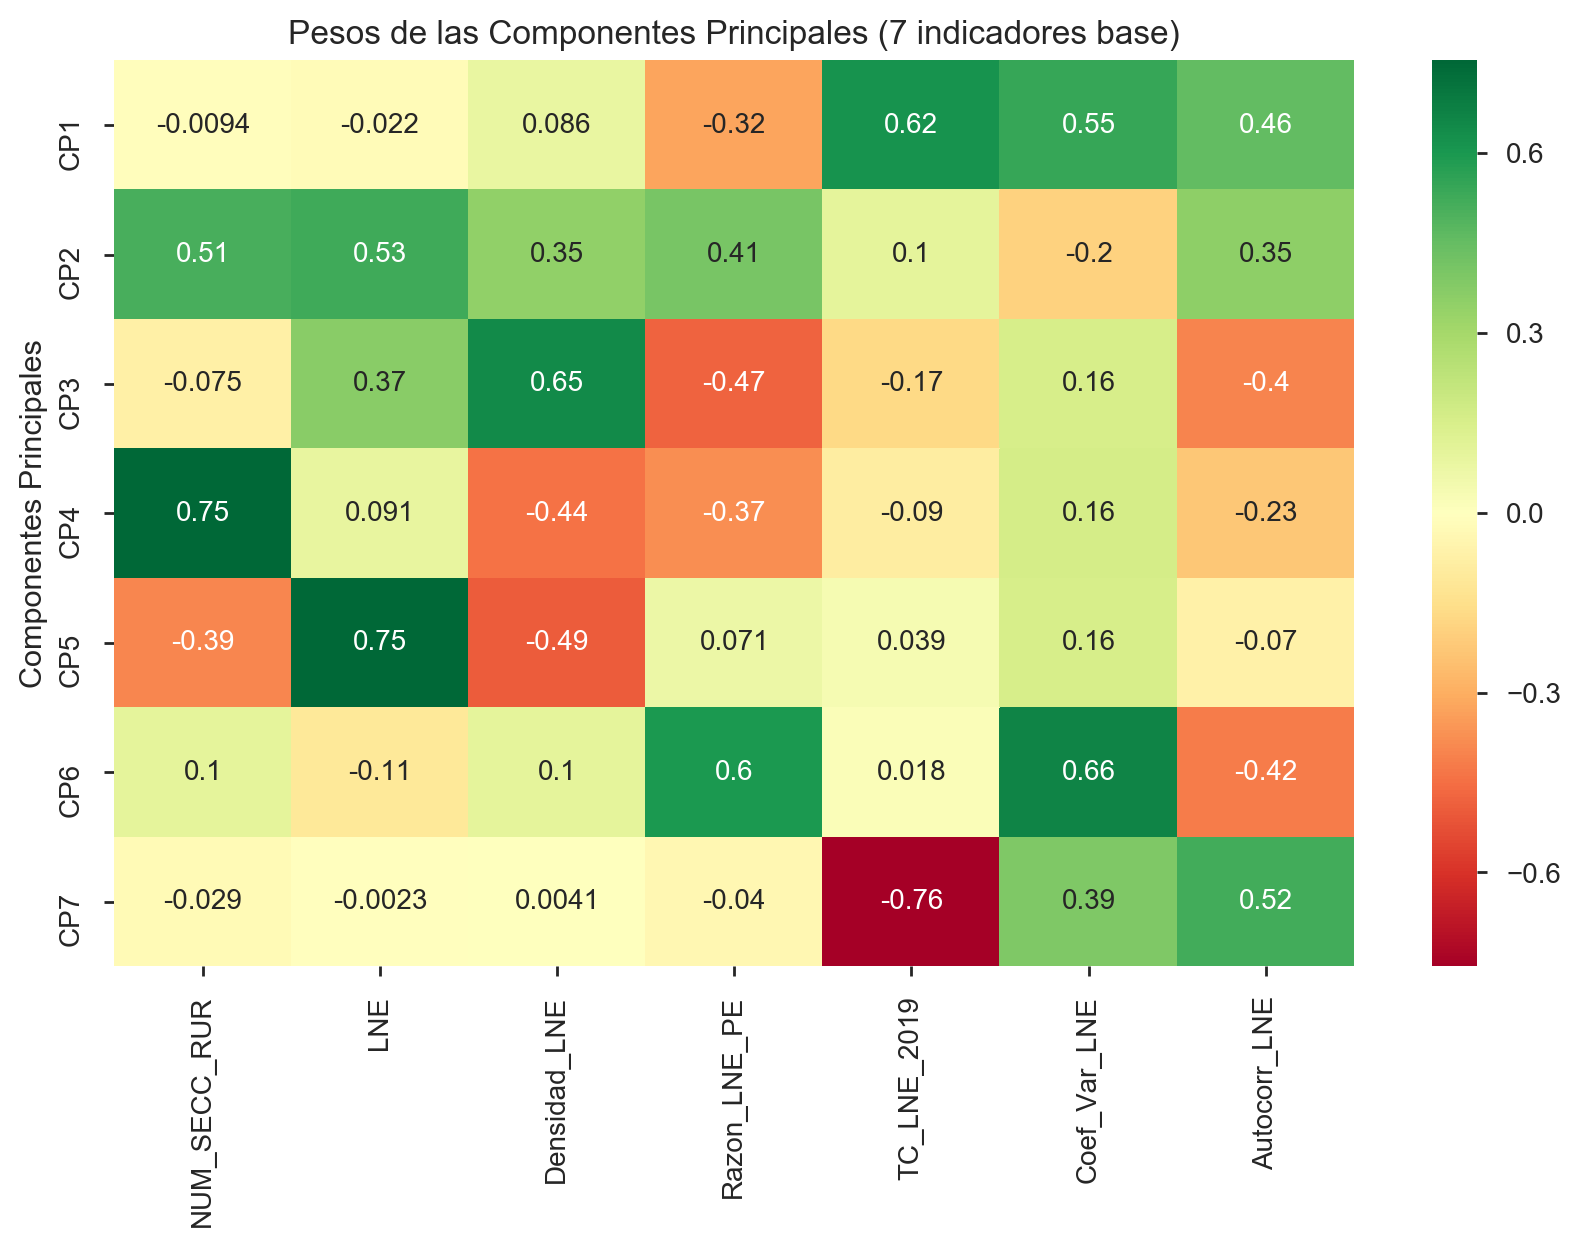

In [21]:
plt.figure(figsize=(10,6), dpi= 200)
sns.heatmap(df_pca_pesos_ind7, cmap='RdYlGn', center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz (see https://github.com/mwaskom/seaborn/issues/1773)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Pesos de las Componentes Principales (7 indicadores base)')

plt.savefig('Pyplot_PCA_heatmap_ind7.png',dpi=600,bbox_inches="tight")
plt.show() 

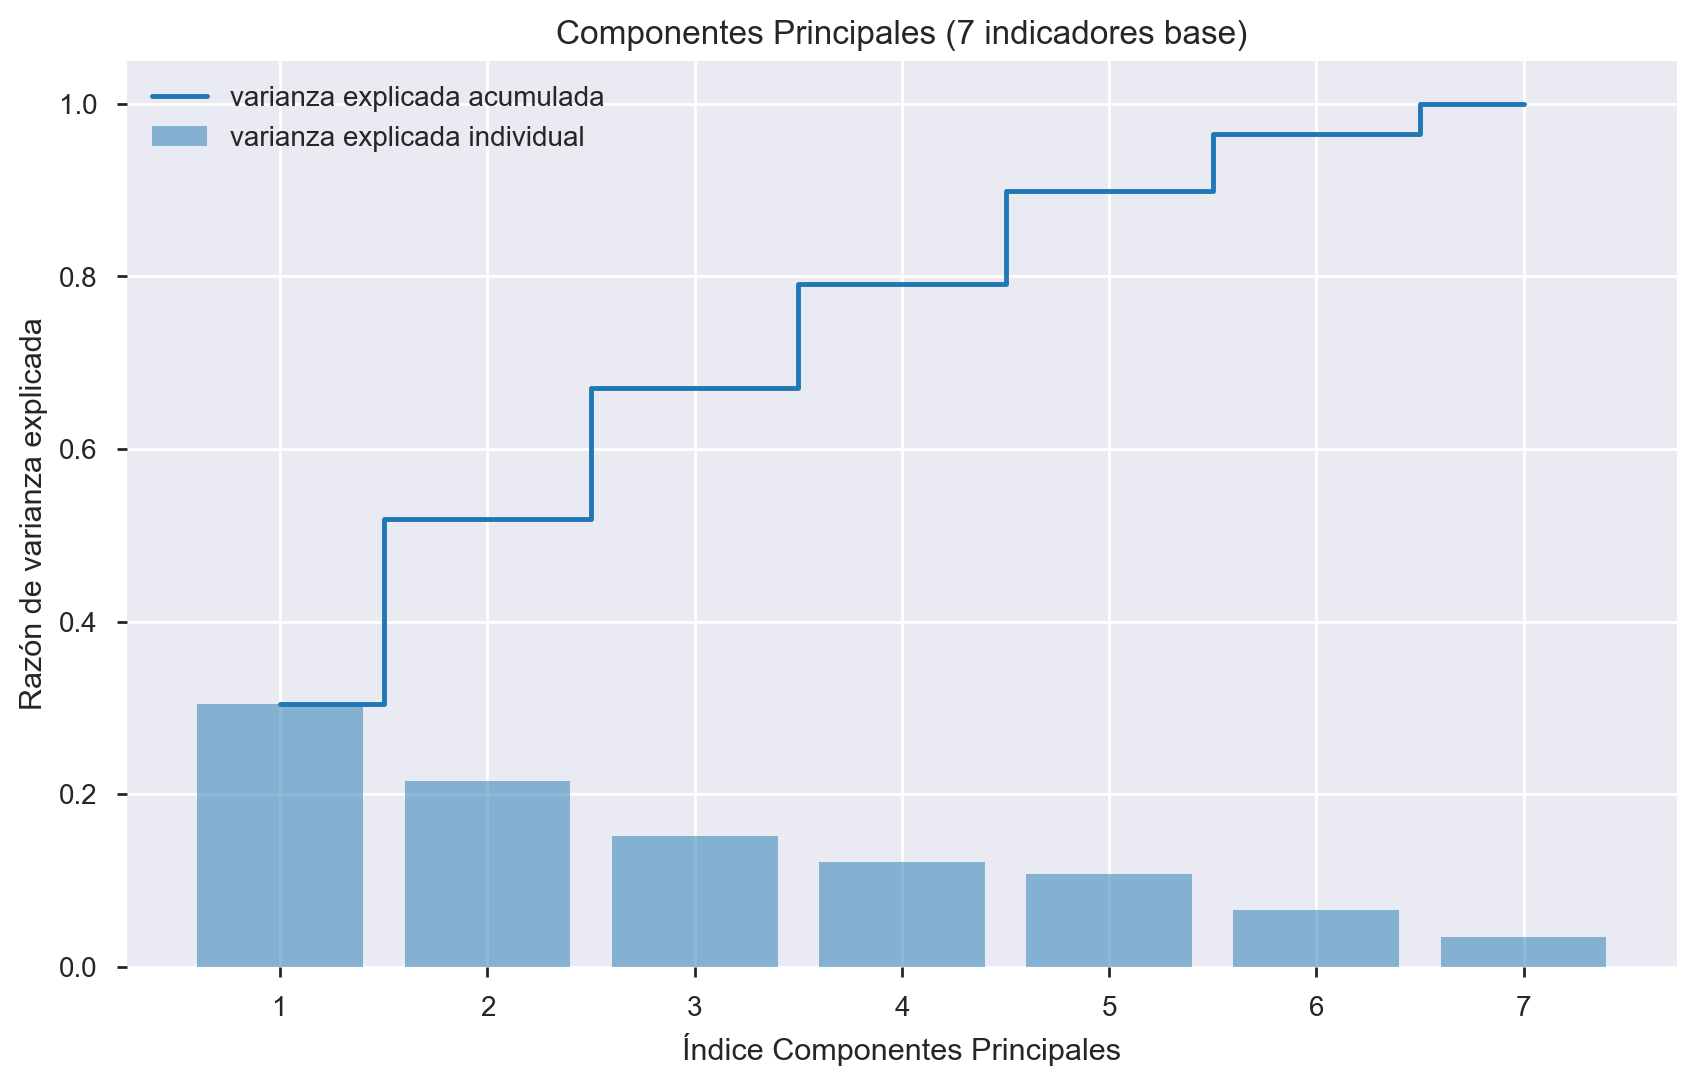

In [22]:

#calculo de la matriz de covarianza y sus correspondientes eigenvalores y eigenvectores
cov_mat = np.cov(x.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# calculate of individual and cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.figure(figsize=(10,6), dpi= 200)
plt.bar(range(1,8), var_exp, alpha=0.5,
        align='center', label='varianza explicada individual')
plt.step(range(1,8), cum_var_exp, where='mid',
         label='varianza explicada acumulada')
plt.ylabel('Razón de varianza explicada')
plt.xlabel('Índice Componentes Principales')
plt.legend(loc='best')
plt.title('Componentes Principales (7 indicadores base)')

plt.savefig('Pyplot_PCA_variance_ind7.png',dpi=600)
plt.show()

In [23]:
#concatenamos los resultados con los metadatos
df_pca_results_ind7 = pd.concat([metadatos[labels], df_pca_ind7], axis = 1)
df_pca_results_ind7.head()
#salvar resultados PCA
df_pca_results_ind7.to_csv(r'Resultados_Mun_PCA_ind7.csv', index = None)

### Proyección de los municipios en el espacio de Componentes Principales (7 indicadores)
Gráfica en el espacio CP1, CP2

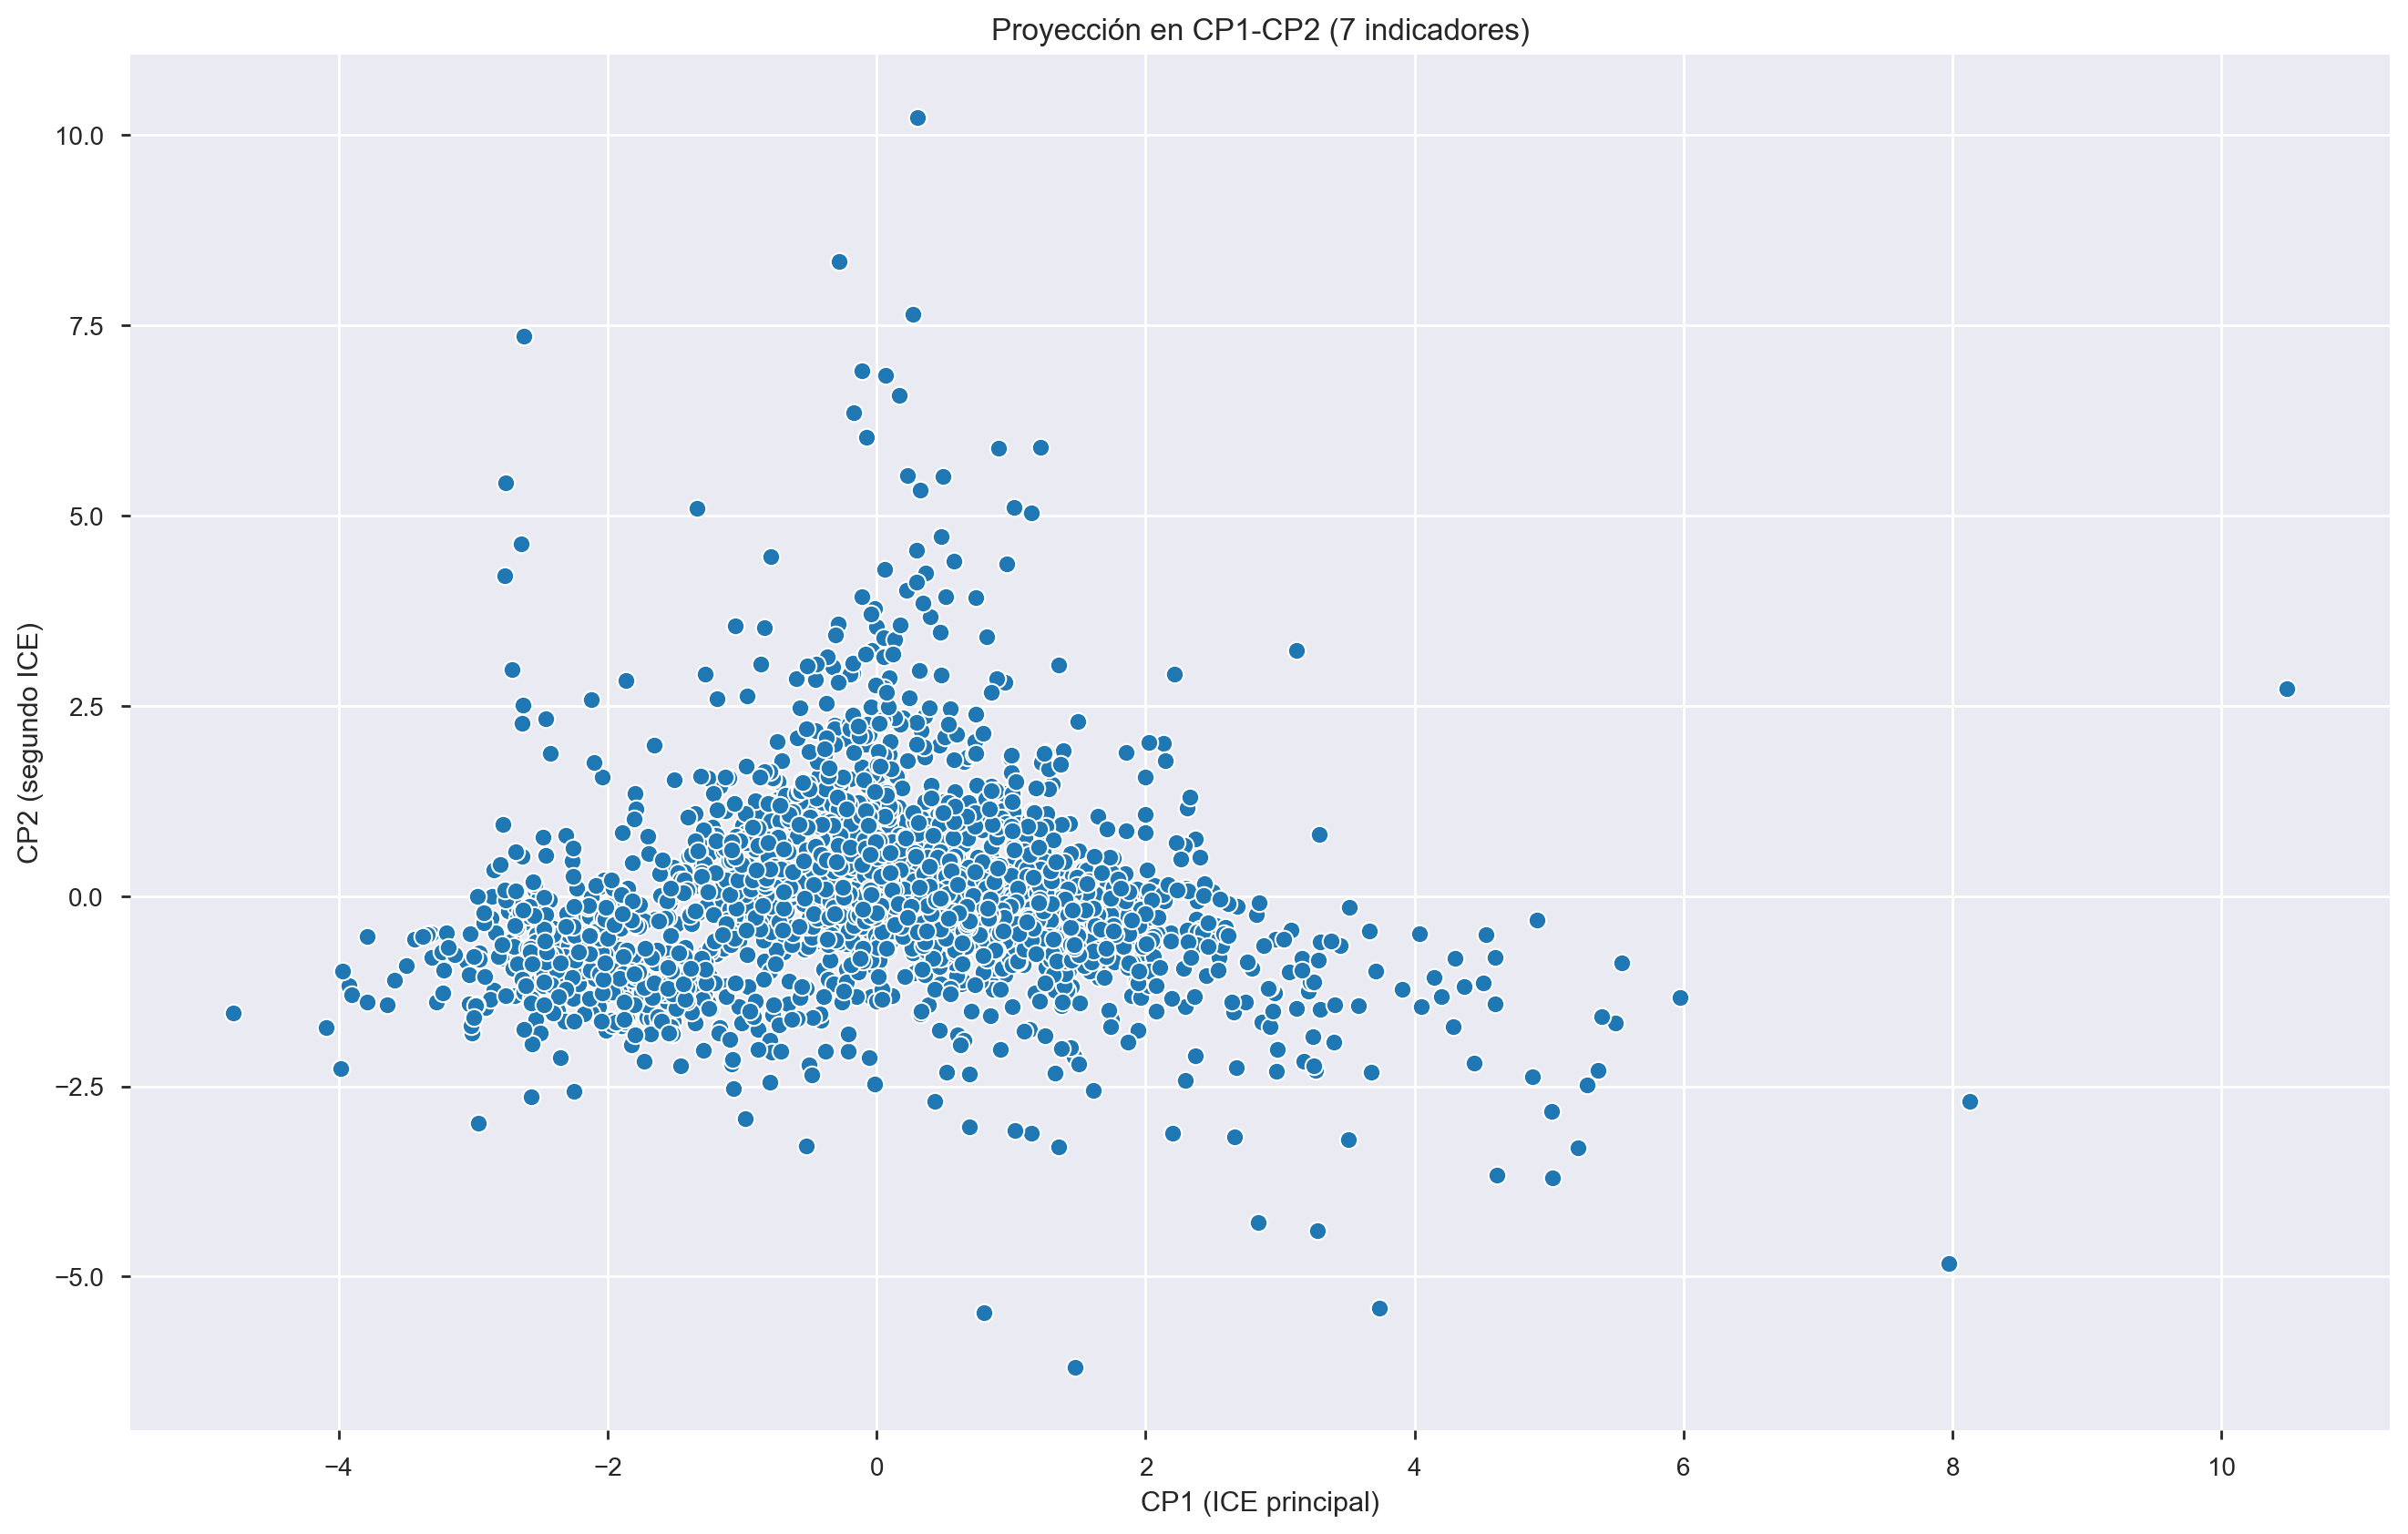

In [24]:
#Scatter plot (seaborn)  PC1 vs PC2
#(see https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python)

plt.figure(figsize=(16, 10), dpi= 200, facecolor='w', edgecolor='k')
sns.scatterplot(x="CP1", y="CP2", 
                data=df_pca_results_ind7)
# Set x-axis label
plt.xlabel('CP1 (ICE principal)')
# Set y-axis label
plt.ylabel('CP2 (segundo ICE)')
plt.title('Proyección en CP1-CP2 (7 indicadores)')

plt.savefig('Pyplot_PCA_projection_ind7.png',dpi=600)

Gráfica en el espacio CP1, CP2, CP3

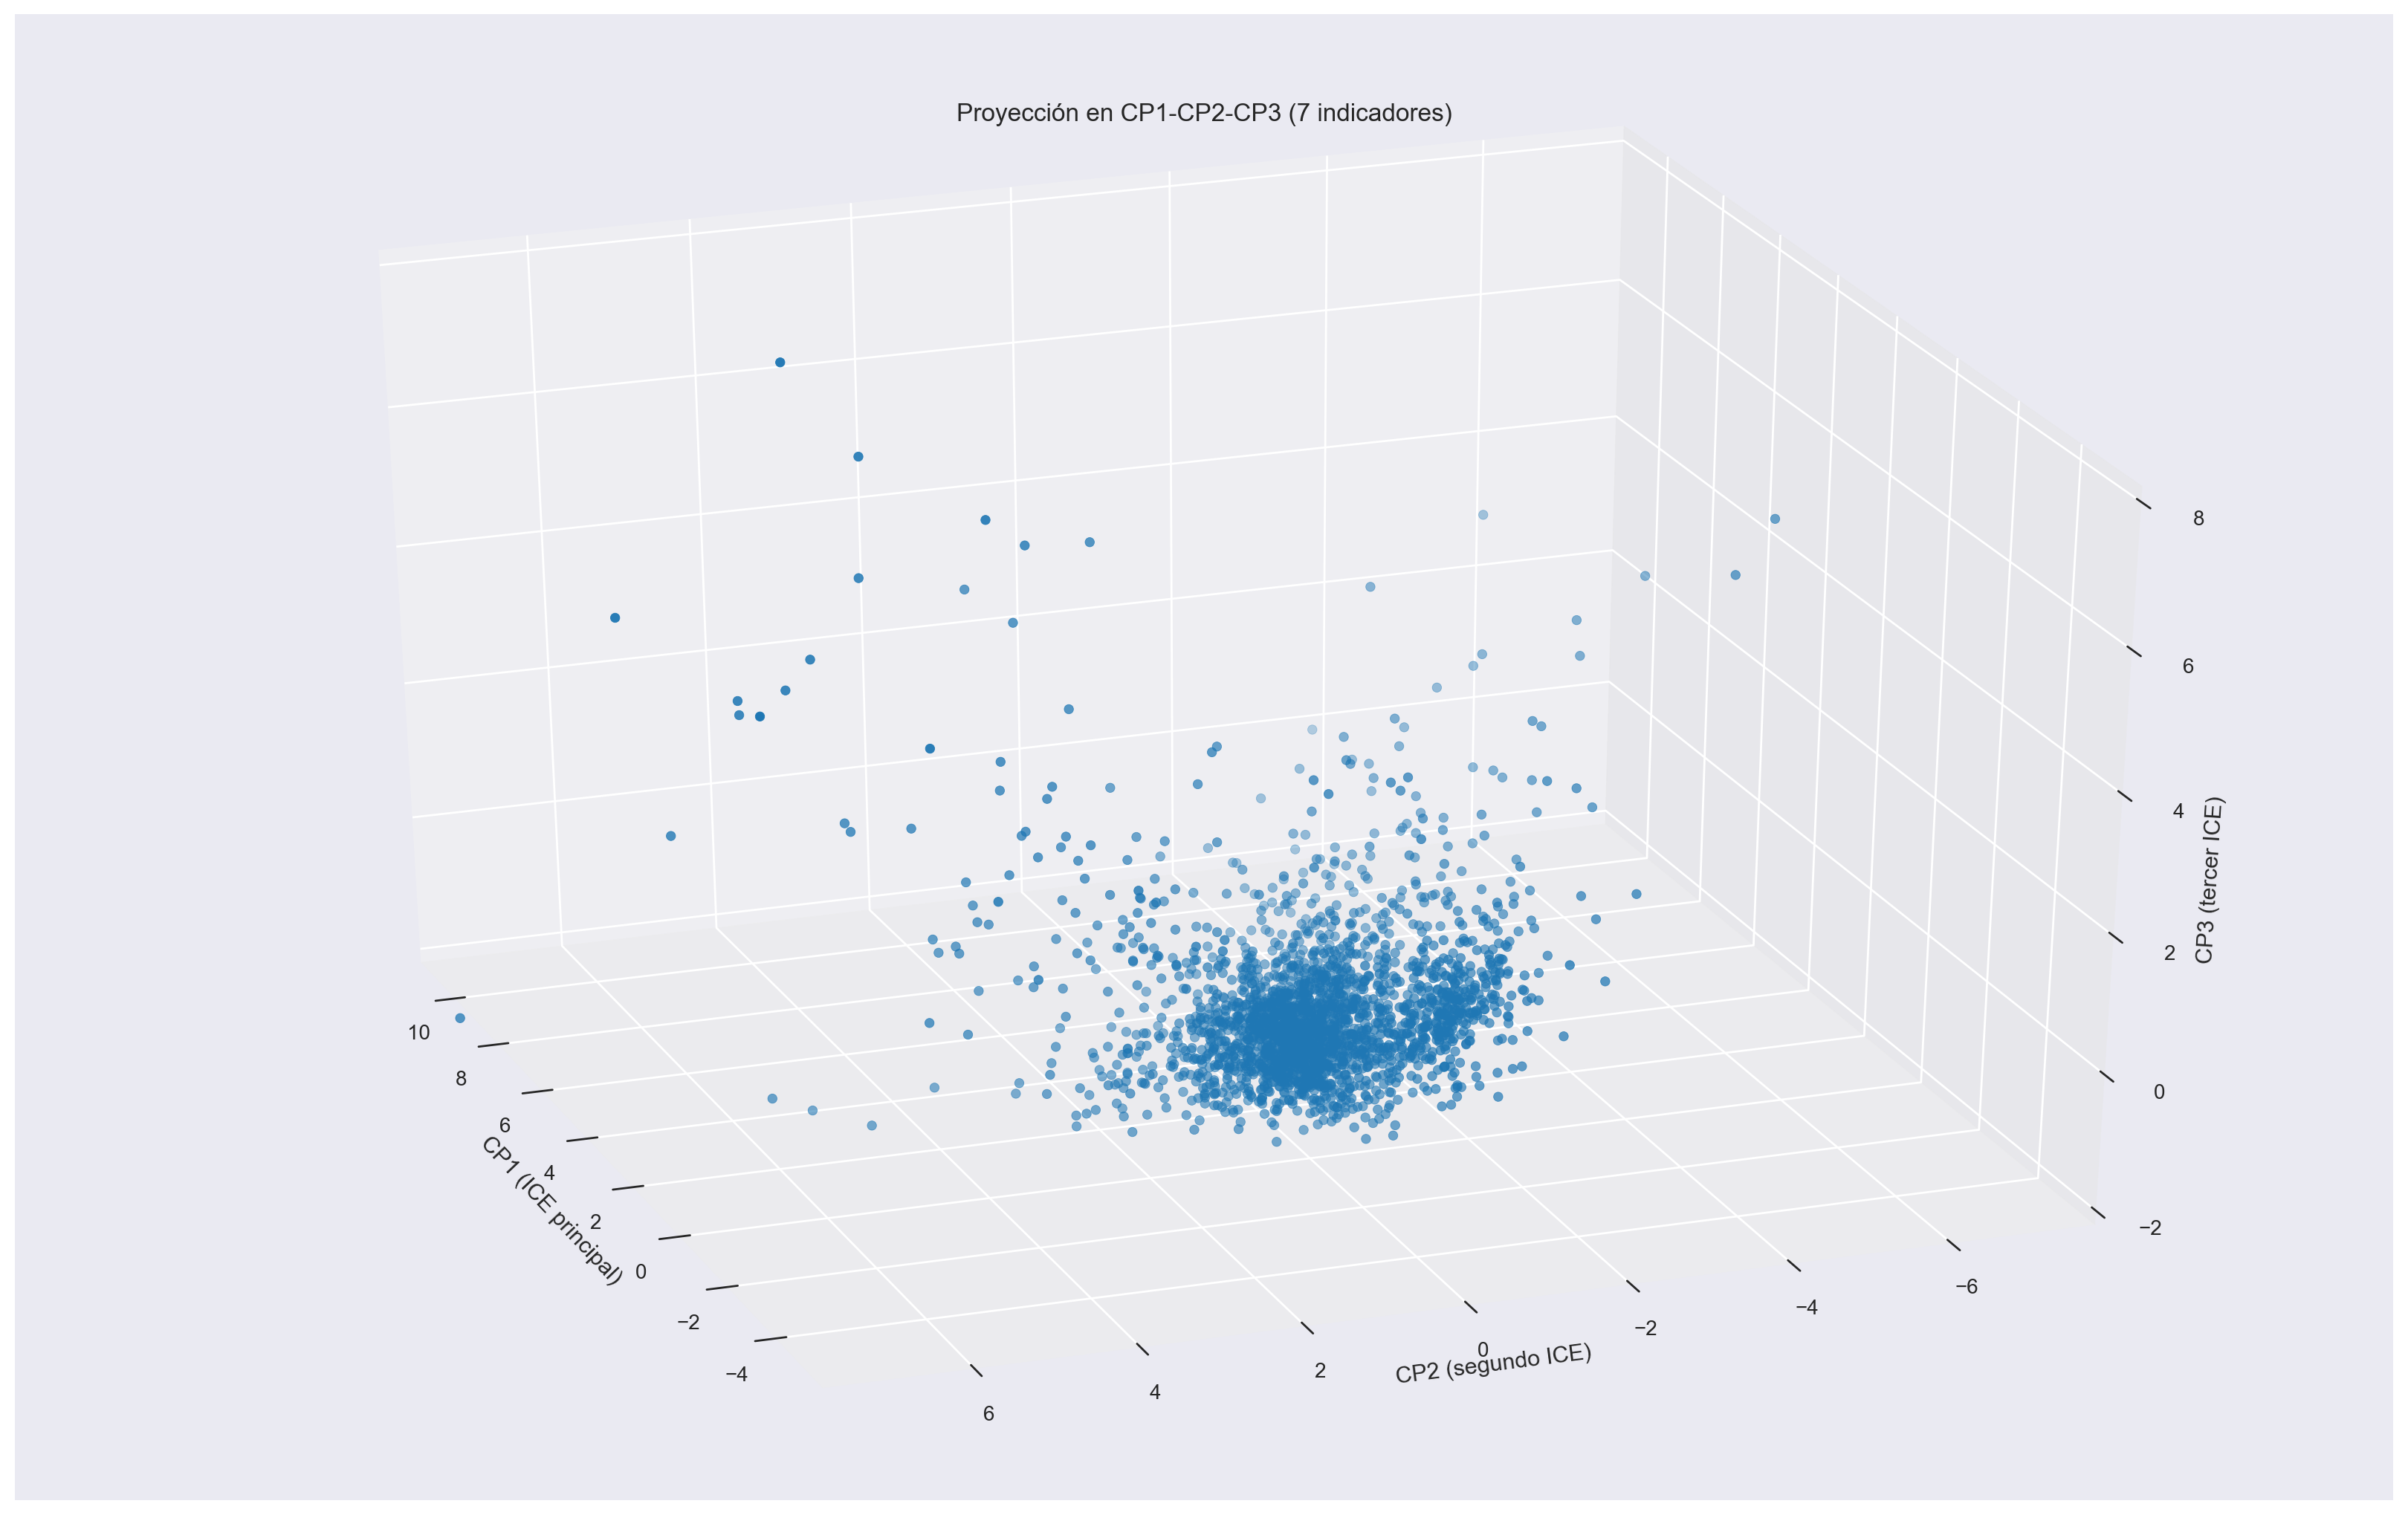

In [25]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

fig = pyplot.figure(figsize=(16, 10), dpi=200, facecolor='w', edgecolor='k')
ax = Axes3D(fig)
ax.scatter(df_pca_results_ind7['CP1'], df_pca_results_ind7['CP2'], df_pca_results_ind7['CP3'],s=20)
# ax.set_xlim3d(-10, 40)
ax.set_ylim3d(-7.5,7.5)
ax.set_zlim3d(-2,8)
ax.set_xlabel('CP1 (ICE principal)')
ax.set_ylabel('CP2 (segundo ICE)')
ax.set_zlabel('CP3 (tercer ICE)')
elev = 30.0
azim = 160.0
ax.view_init(elev, azim)
ax.set_title('Proyección en CP1-CP2-CP3 (7 indicadores)')

plt.savefig('Pyplot_PCA_3dprojection_ind7.png',dpi=600)
pyplot.show()

Gráfica 3d animada

In [26]:
# import plotly.express as px

# fig = px.scatter_3d(df_pca_results_ind7, 
#                     x='CP1', 
#                     y='CP2', 
#                     z='CP3')
# fig.update_layout(scene = dict(
#                     xaxis_title='CP1 (ICE principal)',
#                     yaxis_title='CP2 (segundo ICE)',
#                     zaxis_title='CP3 (tercer ICE)'),
#                  legend_orientation="h")
# fig.show()

## PCA con 8 indicadores

In [27]:
from sklearn.decomposition import PCA

#calculo de PCA con 3 componentes, y obtención de los valores de CP para cada municipio
pca_8cp = PCA(n_components=8)
pca_ind8 = pca_8cp.fit_transform(x2)

#razones de varianza explicada por cada CP 
print('Razón de varianza explicada por cada CP (n_components=3): %s'
      % str(pca_8cp.explained_variance_ratio_))

#dataframe con los valores de los CP por municipio
df_pca_ind8 = pd.DataFrame(data = pca_ind8
             , columns = ['CP1', 'CP2', 'CP3','CP4', 'CP5', 'CP6','CP7', 'CP8'])
df_pca_ind8

Razón de varianza explicada por cada CP (n_components=3): [0.36473046 0.19092654 0.13411757 0.10828747 0.09608798 0.07247213
 0.03226013 0.00111773]


CP1       CP2       CP3       CP4       CP5       CP6       CP7  \
0    -1.159709 -0.088926  0.085300 -0.543018 -0.142316 -0.222009 -0.187705   
1    -3.440113 -1.285088  0.728496  0.120293 -0.172909 -0.843930 -1.123407   
2    -2.781418 -1.021450  0.718691  0.206965 -0.102529 -0.798143 -0.809299   
3    -2.534965 -0.830443  0.289642  0.205096 -0.207061 -0.719092 -0.162937   
4    -2.431221 -0.916419  0.761197  0.793724 -0.097414 -0.731473 -0.563508   
...        ...       ...       ...       ...       ...       ...       ...   
2451  0.252723  0.103555 -0.618837  0.425519  0.394889  0.573138 -0.033045   
2452  0.720756  1.253073 -0.777851  1.510855  0.934339 -0.176500 -0.291345   
2453  2.179487  0.318697 -0.418799  0.704955  0.279212 -0.166946 -0.244594   
2454  0.719159  0.007821 -0.612772  0.247552  0.252320  0.595254 -0.030123   
2455  3.650324 -1.132814  0.286727  0.508656  0.063267  0.840623 -0.156614   

           CP8  
0    -0.002198  
1     0.030126  
2     0.100433  
3    -0.020207  
4    -0.024154  
...        ...  
2451  0.063151  
2452  0.040071  
2453 -0.062764  
2454 -0.003973  
2455 -0.037272  

[2456 rows x 8 columns]

In [28]:
#obtención de los pesos por cada variable
pca_pesos_ind8 = pca_8cp.components_
print(pca_pesos_ind8)

#transformación a un dataframe:
df_pca_pesos_ind8 = pd.DataFrame(pca_pesos_ind8, columns=ind8)
principal_components_pesos = pd.DataFrame(['CP1', 'CP2', 'CP3','CP4', 'CP5', 'CP6','CP7', 'CP8'])
df_pca_pesos_ind8.insert(0, 'Componentes Principales', principal_components_pesos)

#se guarda el último dataframe en un csv
df_pca_pesos_ind8.to_csv(r'Resultados_Mun_PCA_pesos_ind8.csv', index = None)

df_pca_pesos_ind8=df_pca_pesos_ind8.set_index('Componentes Principales')
df_pca_pesos_ind8

[[-0.04385441 -0.03814845  0.04182375 -0.29941882  0.47724467  0.53821795
   0.54546709  0.30040845]
 [ 0.48748178  0.49125939  0.35283614  0.34408916  0.22442326 -0.11873876
  -0.09316958  0.45275796]
 [-0.00893522  0.42570399  0.61023084 -0.39020279 -0.24208379  0.12763639
   0.10517391 -0.45617894]
 [ 0.71984535  0.17133969 -0.53653618 -0.18952765 -0.14731156  0.15150003
   0.12924995 -0.2594515 ]
 [ 0.47452924 -0.6914998   0.41183208 -0.29555671  0.01578382 -0.13012999
  -0.13034461  0.07428283]
 [-0.12408899  0.26163047 -0.20946863 -0.7111252   0.1862874  -0.35341981
  -0.34411872  0.29757186]
 [-0.03991282  0.00203726 -0.00258089 -0.10311712 -0.77872489  0.15290402
   0.15233505  0.57858876]
 [-0.00346822  0.00105446  0.00390526  0.00927952  0.01420917  0.70125617
  -0.71232338  0.0227767 ]]


NUM_SECC_RUR       LNE  Densidad_LNE  Razon_LNE_PE  \
Componentes Principales                                                       
CP1                         -0.043854 -0.038148      0.041824     -0.299419   
CP2                          0.487482  0.491259      0.352836      0.344089   
CP3                         -0.008935  0.425704      0.610231     -0.390203   
CP4                          0.719845  0.171340     -0.536536     -0.189528   
CP5                          0.474529 -0.691500      0.411832     -0.295557   
CP6                         -0.124089  0.261630     -0.209469     -0.711125   
CP7                         -0.039913  0.002037     -0.002581     -0.103117   
CP8                         -0.003468  0.001054      0.003905      0.009280   

                         TC_LNE_2019  Coef_Var_LNE  Var_Prop_LNE  Autocorr_LNE  
Componentes Principales                                                         
CP1                         0.477245      0.538218      0.545467      0.300408  
CP2                         0.224423     -0.118739     -0.093170      0.452758  
CP3                        -0.242084      0.127636      0.105174     -0.456179  
CP4                        -0.147312      0.151500      0.129250     -0.259452  
CP5                         0.015784     -0.130130     -0.130345      0.074283  
CP6                         0.186287     -0.353420     -0.344119      0.297572  
CP7                        -0.778725      0.152904      0.152335      0.578589  
CP8                         0.014209      0.701256     -0.712323      0.022777

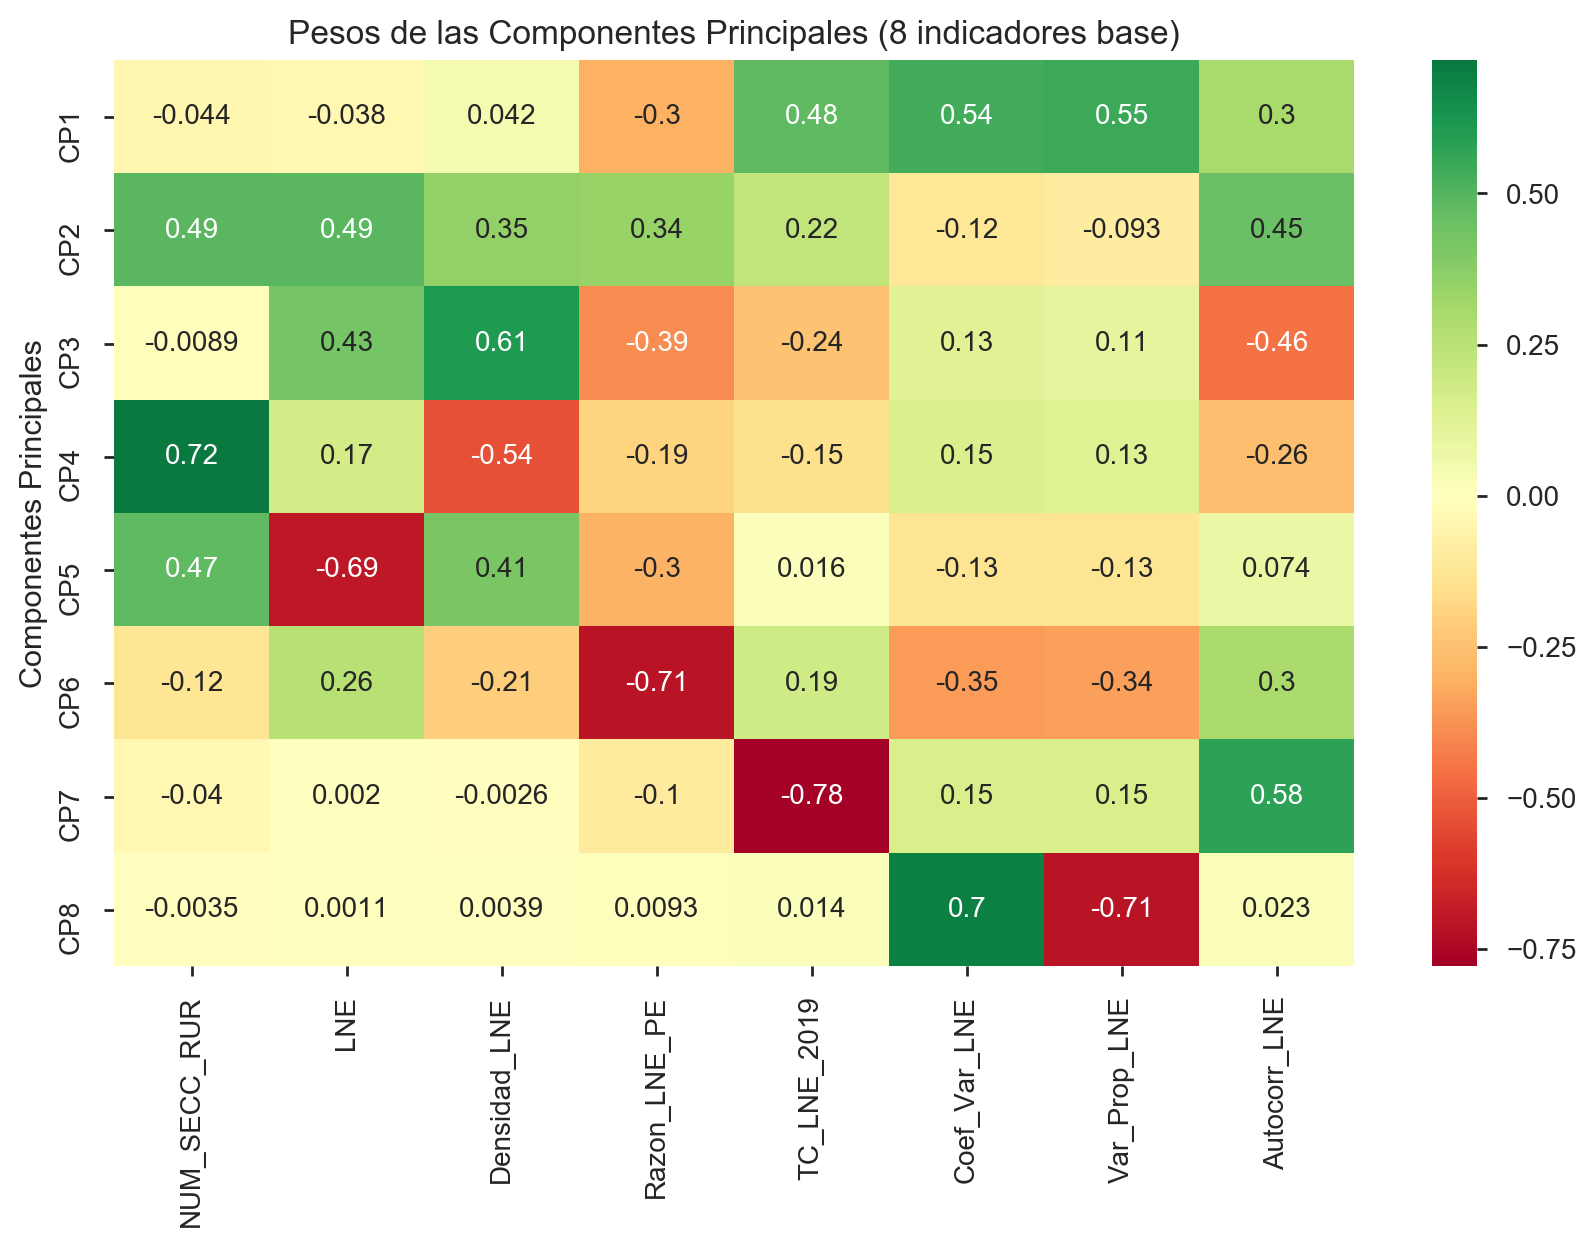

In [29]:
plt.figure(figsize=(10,6), dpi= 200)
sns.heatmap(df_pca_pesos_ind8, cmap='RdYlGn', center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz (see https://github.com/mwaskom/seaborn/issues/1773)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Pesos de las Componentes Principales (8 indicadores base)')

plt.savefig('Pyplot_PCA_heatmap_ind8.png',dpi=600,bbox_inches="tight")
plt.show() 

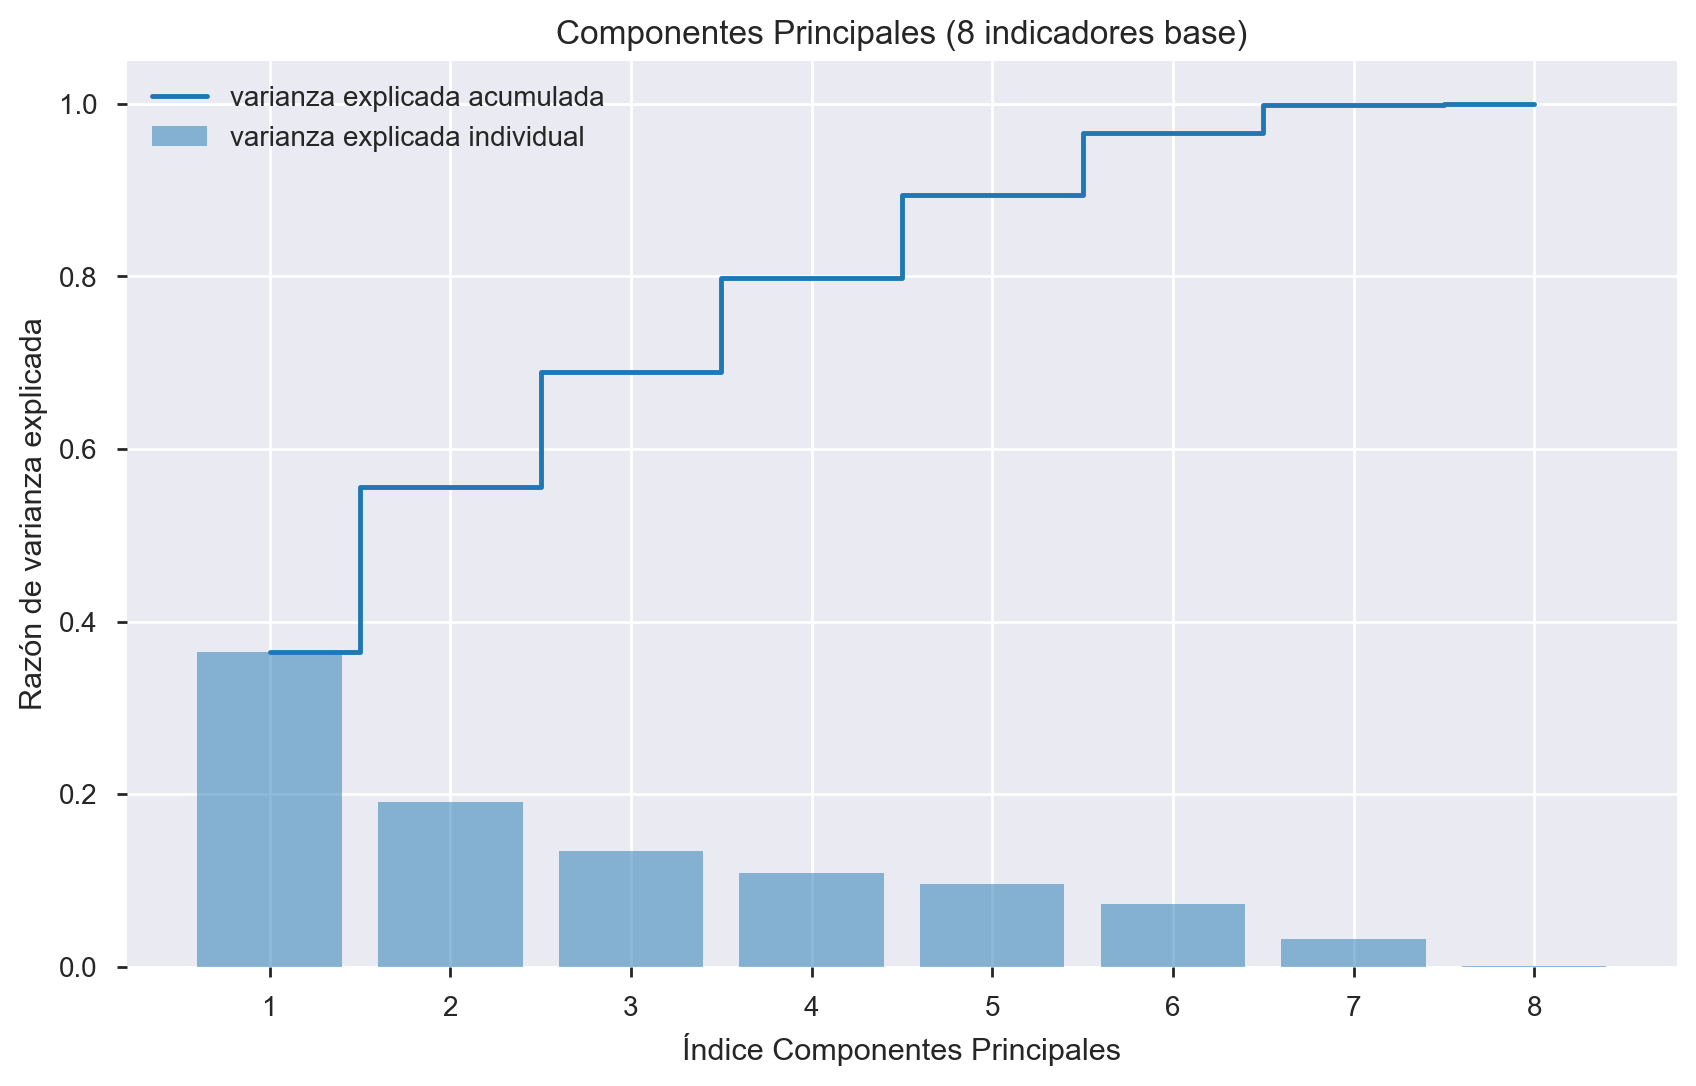

In [30]:

#calculo de la matriz de covarianza y sus correspondientes eigenvalores y eigenvectores
cov_mat = np.cov(x2.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# calculate of individual and cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.figure(figsize=(10,6), dpi= 200)
plt.bar(range(1,9), var_exp, alpha=0.5,
        align='center', label='varianza explicada individual')
plt.step(range(1,9), cum_var_exp, where='mid',
         label='varianza explicada acumulada')
plt.ylabel('Razón de varianza explicada')
plt.xlabel('Índice Componentes Principales')
plt.legend(loc='best')
plt.title('Componentes Principales (8 indicadores base)')

plt.savefig('Pyplot_PCA_variance_ind8.png',dpi=600)
plt.show()

In [31]:
#concatenamos los resultados con los metadatos
df_pca_results_ind8 = pd.concat([metadatos[labels], df_pca_ind8], axis = 1)
df_pca_results_ind8.head()
#salvar resultados PCA
df_pca_results_ind8.to_csv(r'Resultados_Mun_PCA_ind8.csv', index = None)

### Proyección de los municipios en el espacio de Componentes Principales (8 indicadores)
Gráfica en el espacio CP1, CP2

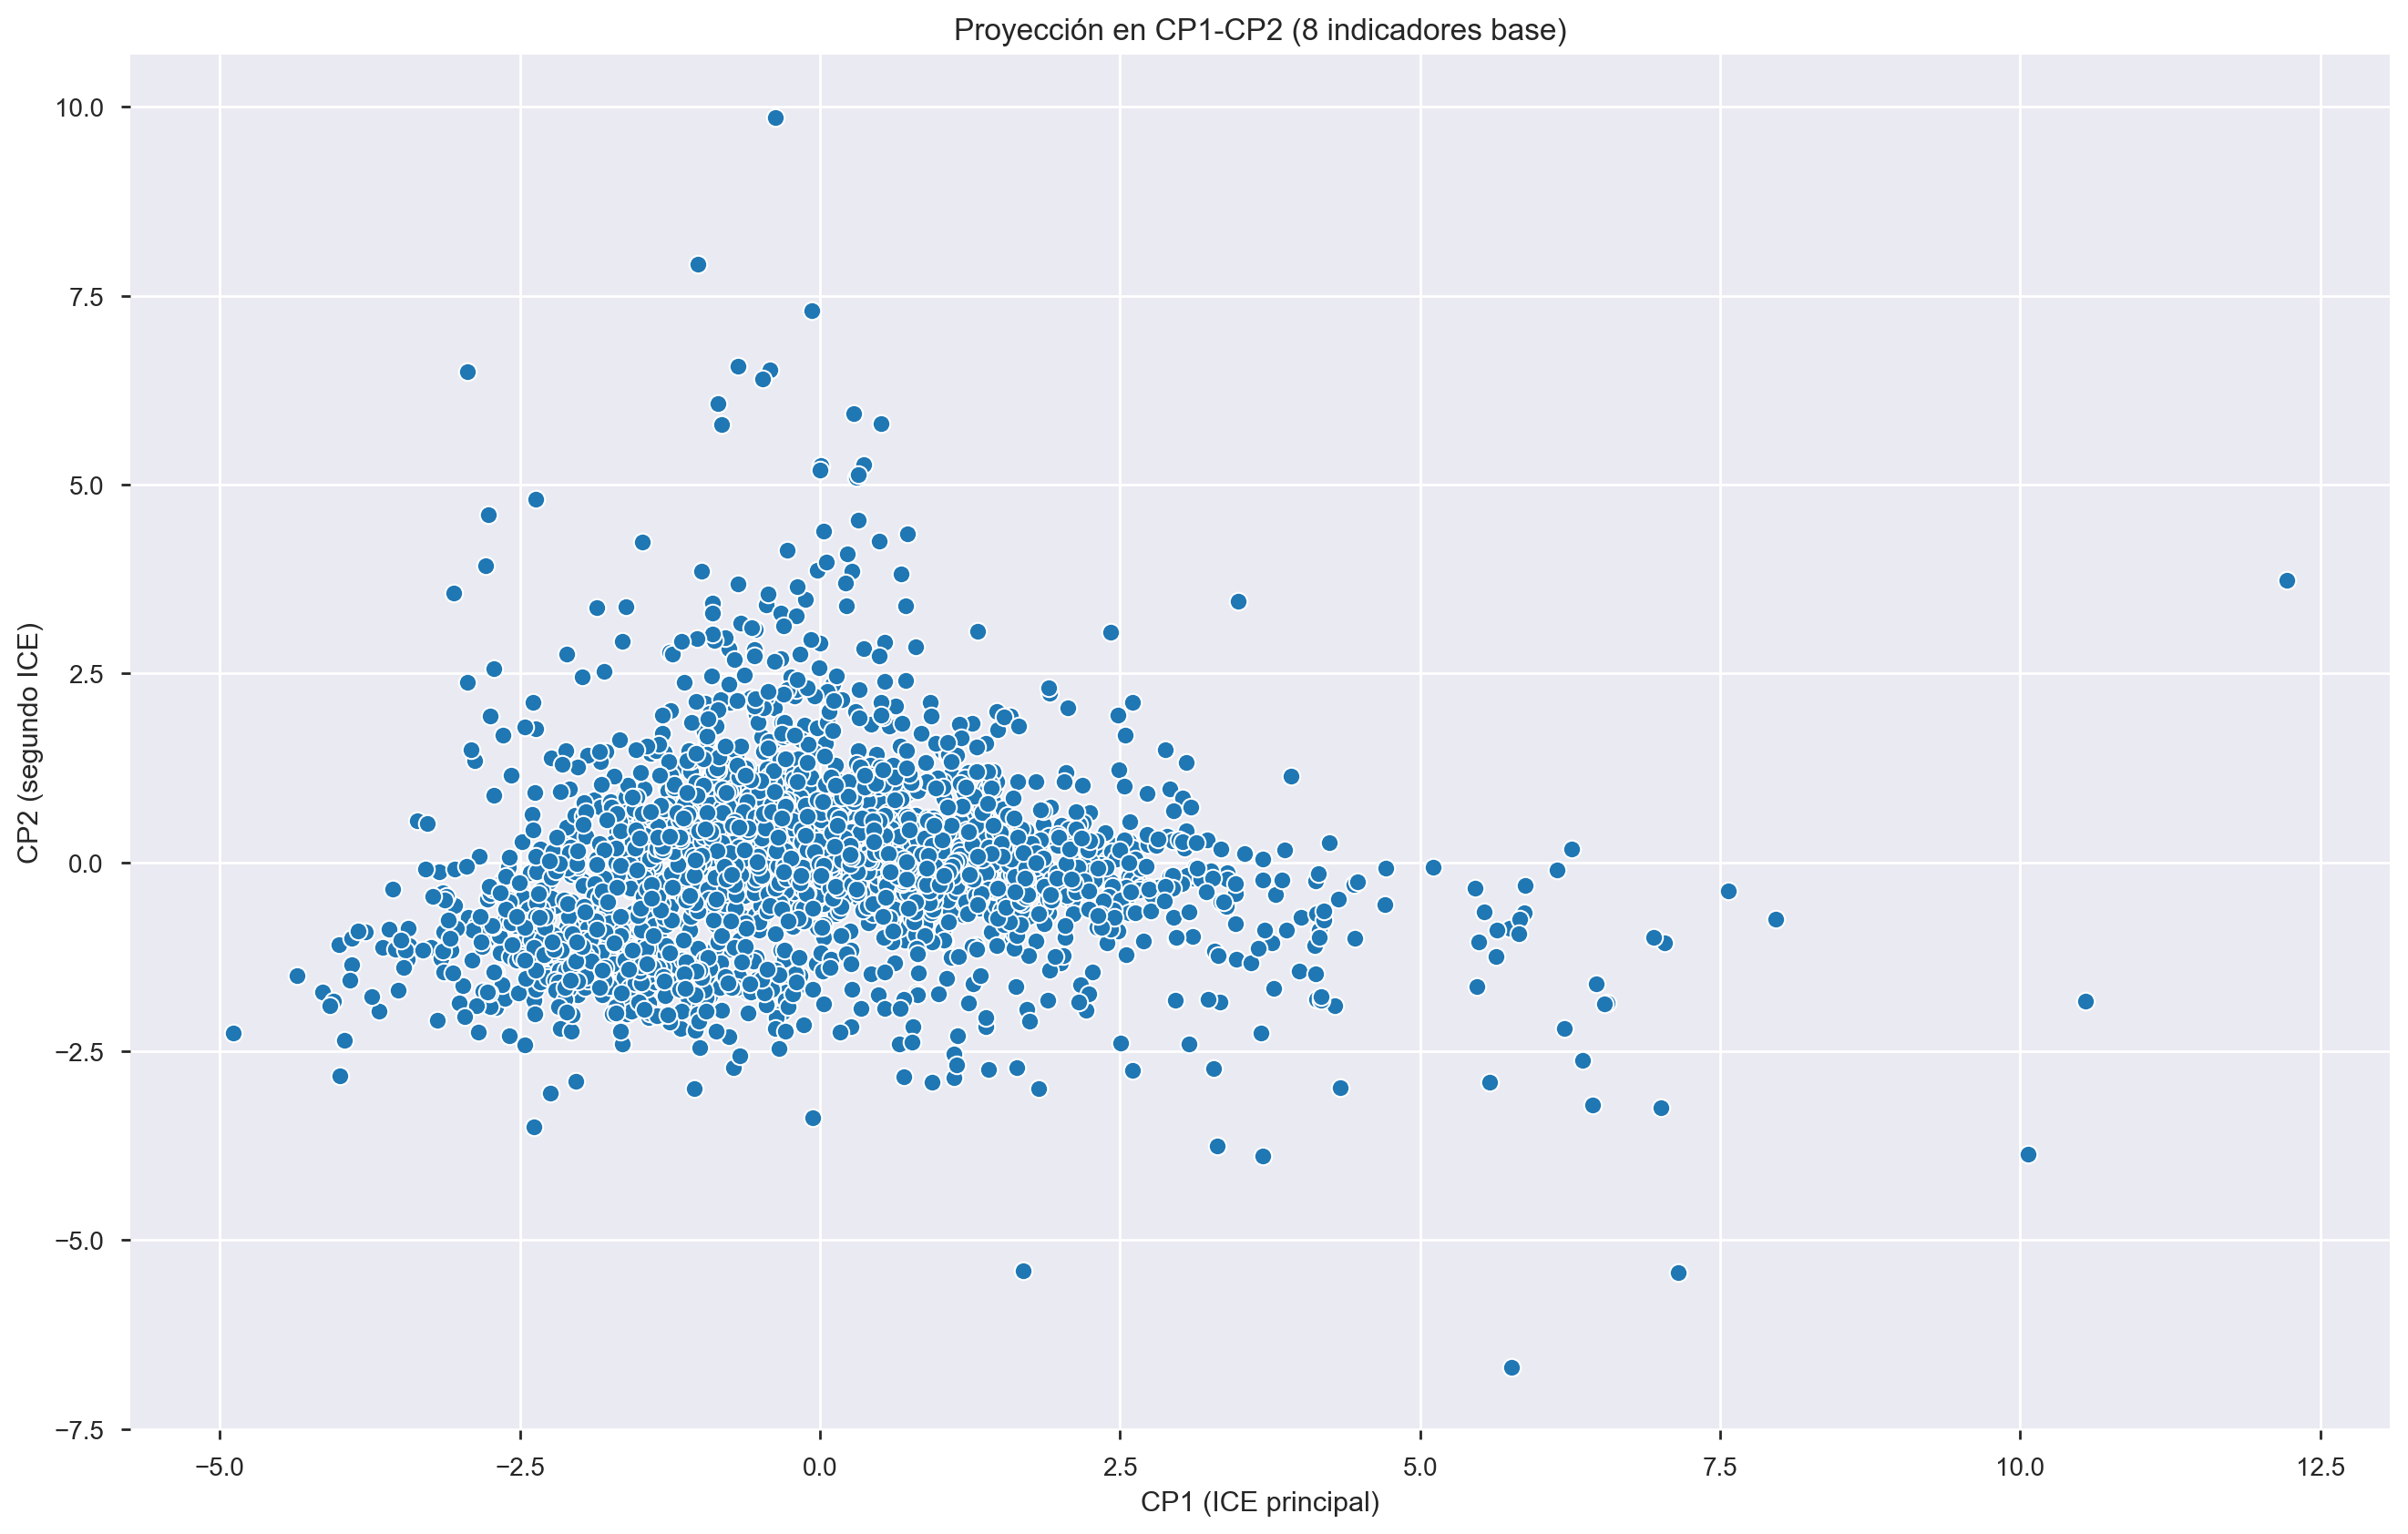

In [32]:
#Scatter plot (seaborn) PC1 vs PC2

plt.figure(figsize=(16, 10), dpi= 200, facecolor='w', edgecolor='k')
sns.scatterplot(x="CP1", y="CP2", 
                data=df_pca_results_ind8)
# Set x-axis label
plt.xlabel('CP1 (ICE principal)')
# Set y-axis label
plt.ylabel('CP2 (segundo ICE)')
plt.title('Proyección en CP1-CP2 (8 indicadores base)')

plt.savefig('Pyplot_PCA_projection_ind8.png',dpi=600)

Gráfica en el espacio CP1, CP2, CP3

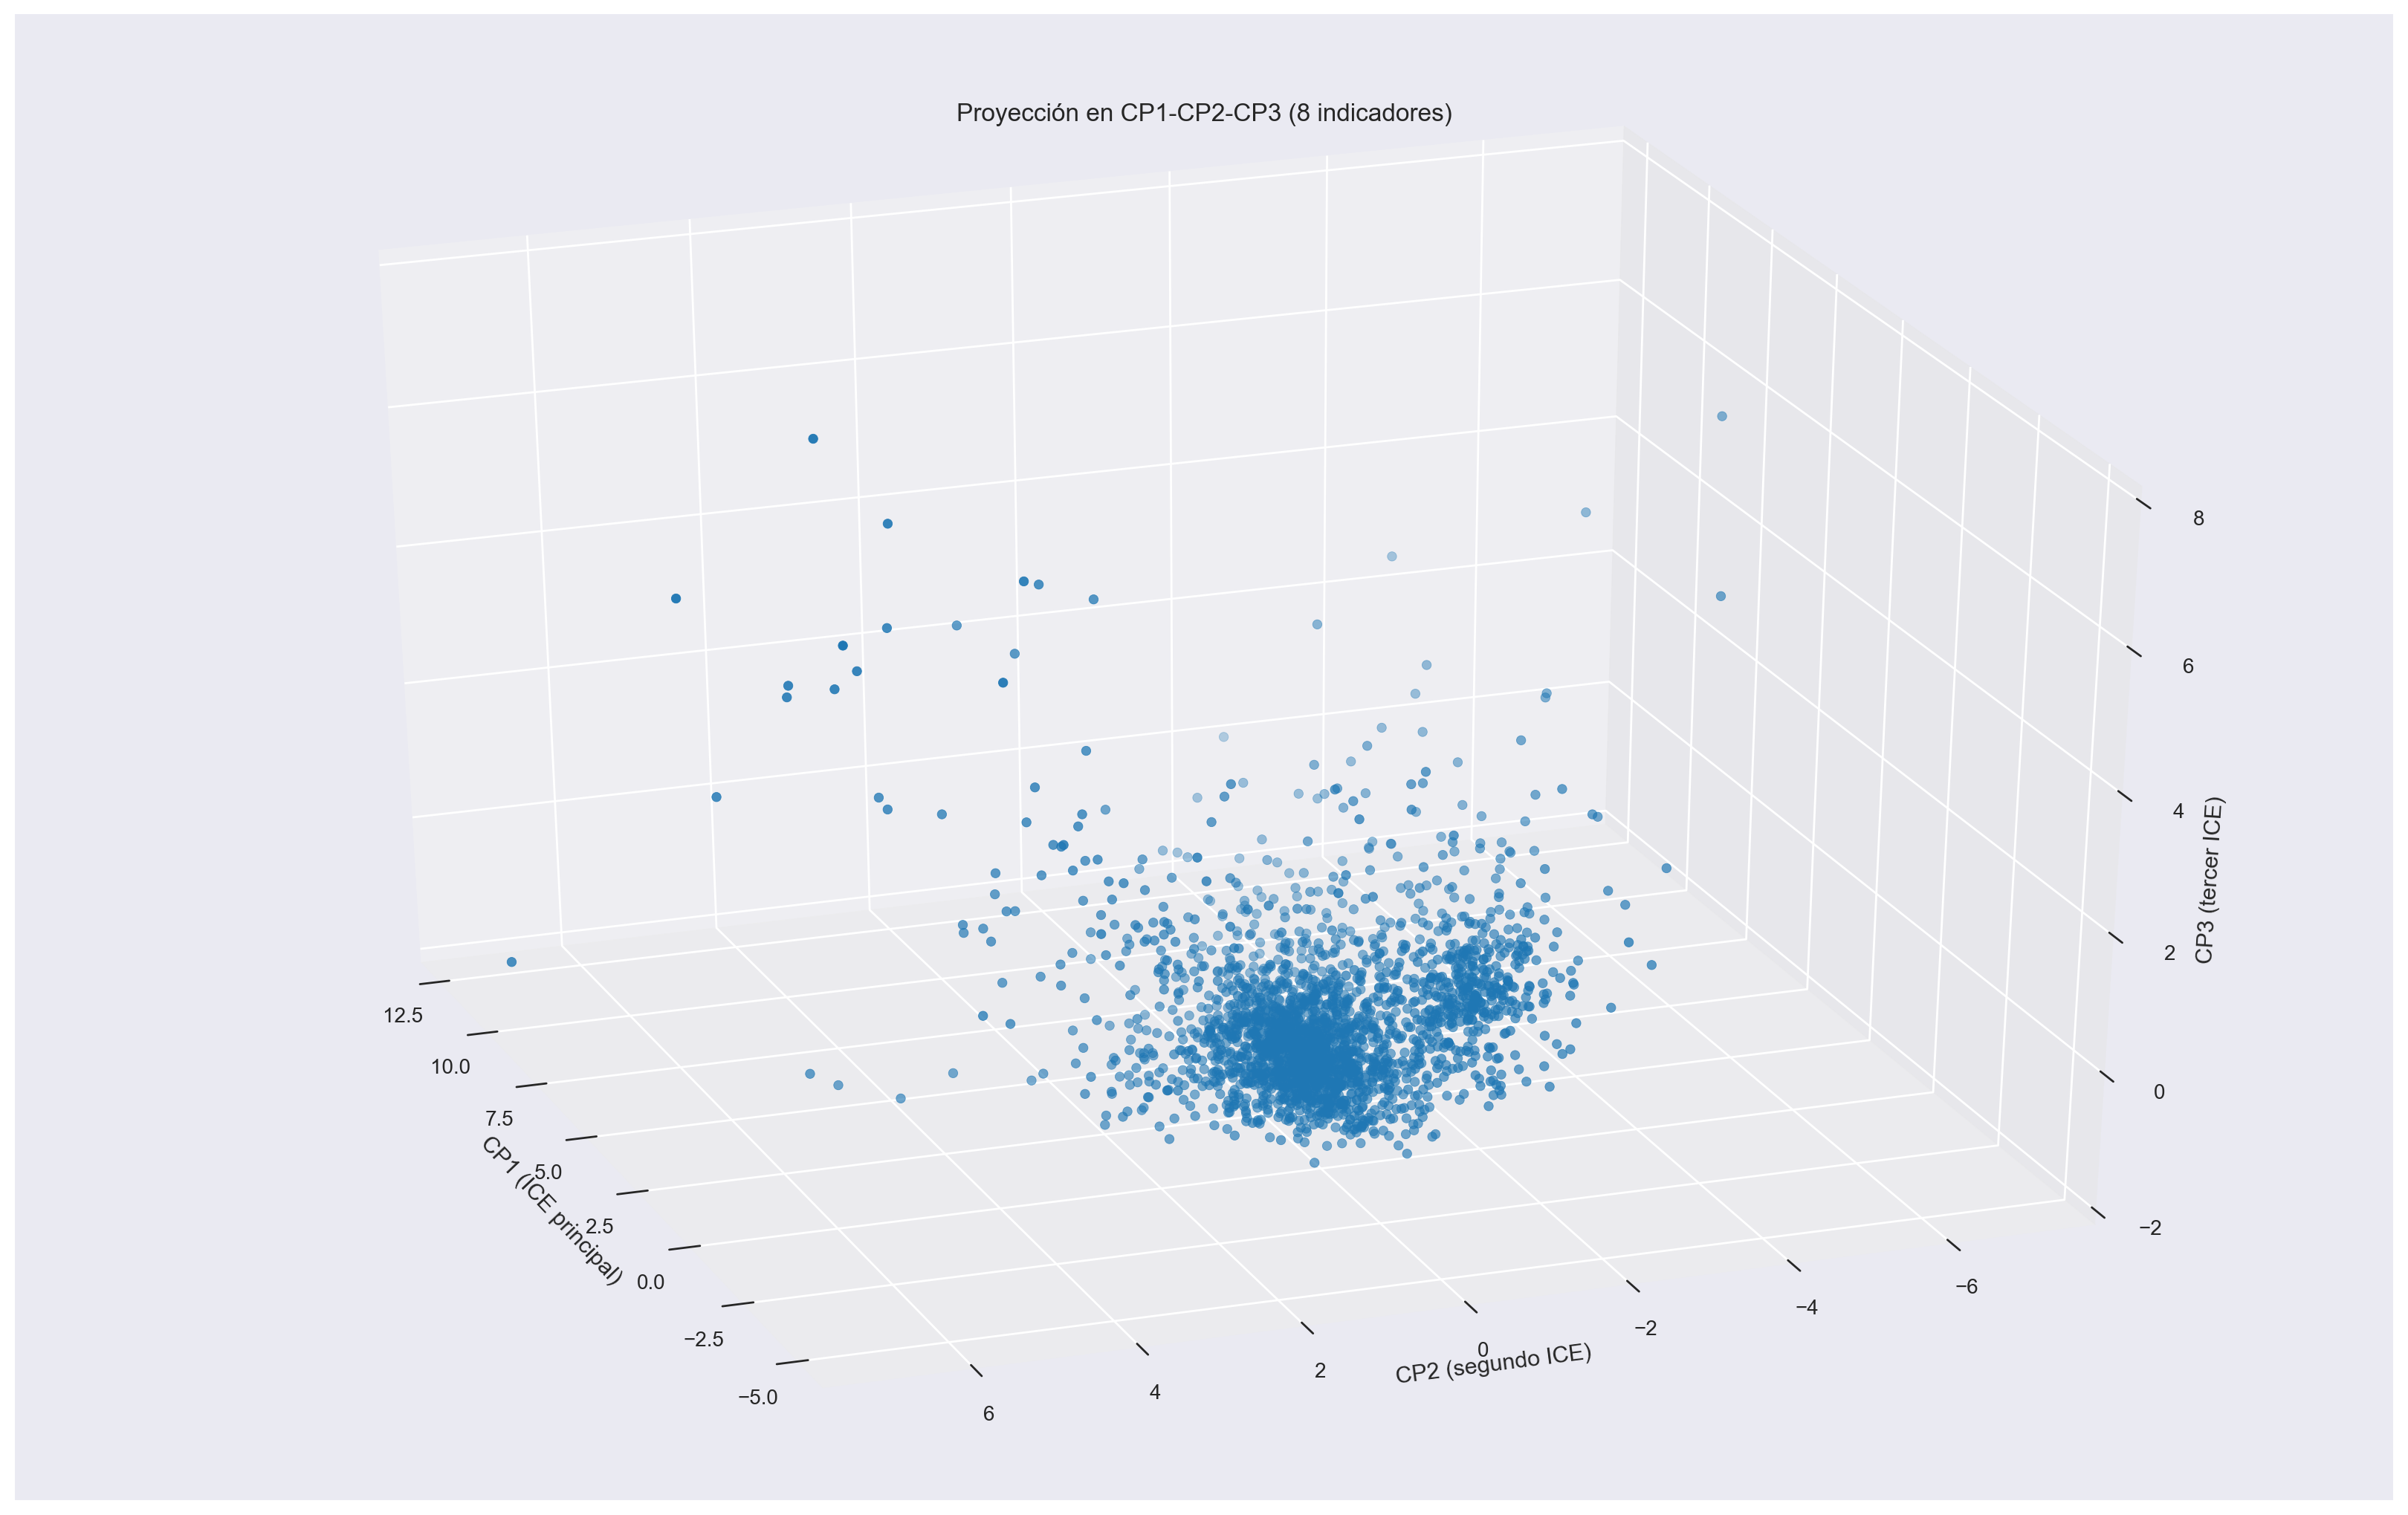

In [33]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

fig = pyplot.figure(figsize=(16, 10), dpi=200, facecolor='w', edgecolor='k')
ax = Axes3D(fig)
ax.scatter(df_pca_results_ind8['CP1'], df_pca_results_ind8['CP2'], df_pca_results_ind8['CP3'],s=20)
# ax.set_xlim3d(-10, 40)
ax.set_ylim3d(-7.5,7.5)
ax.set_zlim3d(-2,8)
ax.set_xlabel('CP1 (ICE principal)')
ax.set_ylabel('CP2 (segundo ICE)')
ax.set_zlabel('CP3 (tercer ICE)')
elev = 30.0
azim = 160.0
ax.view_init(elev, azim)
ax.set_title('Proyección en CP1-CP2-CP3 (8 indicadores)')

plt.savefig('Pyplot_PCA_3dprojection_ind8.png',dpi=600)
pyplot.show()

Gráfica 3d animada

In [34]:
# import plotly.express as px

# fig = px.scatter_3d(df_pca_results_ind8, 
#                     x='CP1', 
#                     y='CP2', 
#                     z='CP3')
# fig.update_layout(scene = dict(
#                     xaxis_title='CP1 (ICE principal)',
#                     yaxis_title='CP2 (segundo ICE)',
#                     zaxis_title='CP3 (tercer ICE)'),
#                  legend_orientation="h")
# fig.show()

## PCA con 8 indicadores (transformación log en LNE y Densidad)

In [35]:
from sklearn.decomposition import PCA

#calculo de PCA con 8 componentes, y obtención de los valores de CP para cada municipio
pca_8cp_tf = PCA(n_components=8)
pca_ind8_tf = pca_8cp_tf.fit_transform(x3)

#razones de varianza explicada por cada CP 
print('Razón de varianza explicada por cada CP (n_components=3): %s'
      % str(pca_8cp_tf.explained_variance_ratio_))

#dataframe con los valores de los CP por municipio
df_pca_ind8_tf = pd.DataFrame(data = pca_ind8_tf
             , columns = ['CP1', 'CP2', 'CP3','CP4', 'CP5', 'CP6','CP7', 'CP8'])
df_pca_ind8_tf

Razón de varianza explicada por cada CP (n_components=3): [0.36439553 0.26076989 0.11972828 0.09943208 0.07952562 0.04292748
 0.03212475 0.00109636]


CP1       CP2       CP3       CP4       CP5       CP6       CP7  \
0    -1.123957  0.770085  0.164774 -0.915654 -0.492972 -0.317918 -0.188139   
1    -3.456425 -0.735941  1.007405 -0.562512 -0.936801  0.185125 -1.159336   
2    -2.780315 -0.217879  1.125977 -0.520060 -0.949179 -0.029845 -0.828418   
3    -2.545177 -0.264797  0.625283 -0.108215 -0.902348 -0.148185 -0.154942   
4    -2.432097 -0.075186  1.405509  0.187352 -0.990950 -0.483391 -0.528715   
...        ...       ...       ...       ...       ...       ...       ...   
2451  0.208244 -0.355269 -0.474706  1.141162  0.719067 -0.406781  0.034851   
2452  0.741788  1.244269  0.149342  1.906565  0.497395  0.335199 -0.281648   
2453  2.190433  0.411954  0.112989  0.742667  0.050829  0.123076 -0.241525   
2454  0.681040 -0.336669 -0.510570  0.871445  0.621117 -0.507095  0.039586   
2455  3.580262 -1.780109  0.340235  0.526569  0.719428 -0.483072 -0.099760   

           CP8  
0     0.012307  
1     0.032465  
2     0.109442  
3    -0.011660  
4    -0.007322  
...        ...  
2451  0.060747  
2452  0.031614  
2453 -0.064545  
2454 -0.003077  
2455 -0.038375  

[2456 rows x 8 columns]

In [36]:
#obtención de los pesos por cada variable
pca_pesos_ind8_tf = pca_8cp_tf.components_
print(pca_pesos_ind8_tf)

#transformación a un dataframe:
df_pca_pesos_ind8_tf = pd.DataFrame(pca_pesos_ind8_tf, columns=ind8_tf)
principal_components_pesos = pd.DataFrame(['CP1', 'CP2', 'CP3','CP4', 'CP5', 'CP6','CP7', 'CP8'])
df_pca_pesos_ind8_tf.insert(0, 'Componentes Principales', principal_components_pesos)

#se guarda el último dataframe en un csv
df_pca_pesos_ind8_tf.to_csv(r'Resultados_Mun_PCA_pesos_ind8_tf.csv', index = None)

df_pca_pesos_ind8_tf=df_pca_pesos_ind8_tf.set_index('Componentes Principales')
df_pca_pesos_ind8_tf

[[-0.03241635  0.01085985  0.04981347 -0.29236253  0.48121808  0.53629243
   0.54412168  0.30923322]
 [ 0.4440639   0.59041598  0.45994435  0.28938166  0.1476166  -0.11122861
  -0.08737227  0.34224157]
 [ 0.36339034  0.21156354  0.29382169 -0.50388188 -0.32141496  0.18018398
   0.15024918 -0.5697469 ]
 [ 0.6838984   0.00199082 -0.71037727  0.12154071  0.01415709  0.08401343
   0.07490165  0.0014363 ]
 [ 0.24801668 -0.27200767  0.04840862 -0.66500418  0.19391601 -0.3618149
  -0.35669896  0.35238901]
 [ 0.36982792 -0.72724004  0.43471848  0.32329303 -0.10014728  0.13385177
   0.10908787  0.03169788]
 [-0.0599421   0.05797166 -0.06064634 -0.12385401 -0.77156616  0.14366803
   0.14511962  0.58052897]
 [-0.01043298  0.0173486  -0.00110782  0.00495456  0.01353723  0.70073339
  -0.71268408  0.02086319]]


NUM_SECC_RUR  log(LNE)  log(Densidad_LNE)  \
Componentes Principales                                              
CP1                         -0.032416  0.010860           0.049813   
CP2                          0.444064  0.590416           0.459944   
CP3                          0.363390  0.211564           0.293822   
CP4                          0.683898  0.001991          -0.710377   
CP5                          0.248017 -0.272008           0.048409   
CP6                          0.369828 -0.727240           0.434718   
CP7                         -0.059942  0.057972          -0.060646   
CP8                         -0.010433  0.017349          -0.001108   

                         Razon_LNE_PE  TC_LNE_2019  Coef_Var_LNE  \
Componentes Principales                                            
CP1                         -0.292363     0.481218      0.536292   
CP2                          0.289382     0.147617     -0.111229   
CP3                         -0.503882    -0.321415      0.180184   
CP4                          0.121541     0.014157      0.084013   
CP5                         -0.665004     0.193916     -0.361815   
CP6                          0.323293    -0.100147      0.133852   
CP7                         -0.123854    -0.771566      0.143668   
CP8                          0.004955     0.013537      0.700733   

                         Var_Prop_LNE  Autocorr_LNE  
Componentes Principales                              
CP1                          0.544122      0.309233  
CP2                         -0.087372      0.342242  
CP3                          0.150249     -0.569747  
CP4                          0.074902      0.001436  
CP5                         -0.356699      0.352389  
CP6                          0.109088      0.031698  
CP7                          0.145120      0.580529  
CP8                         -0.712684      0.020863

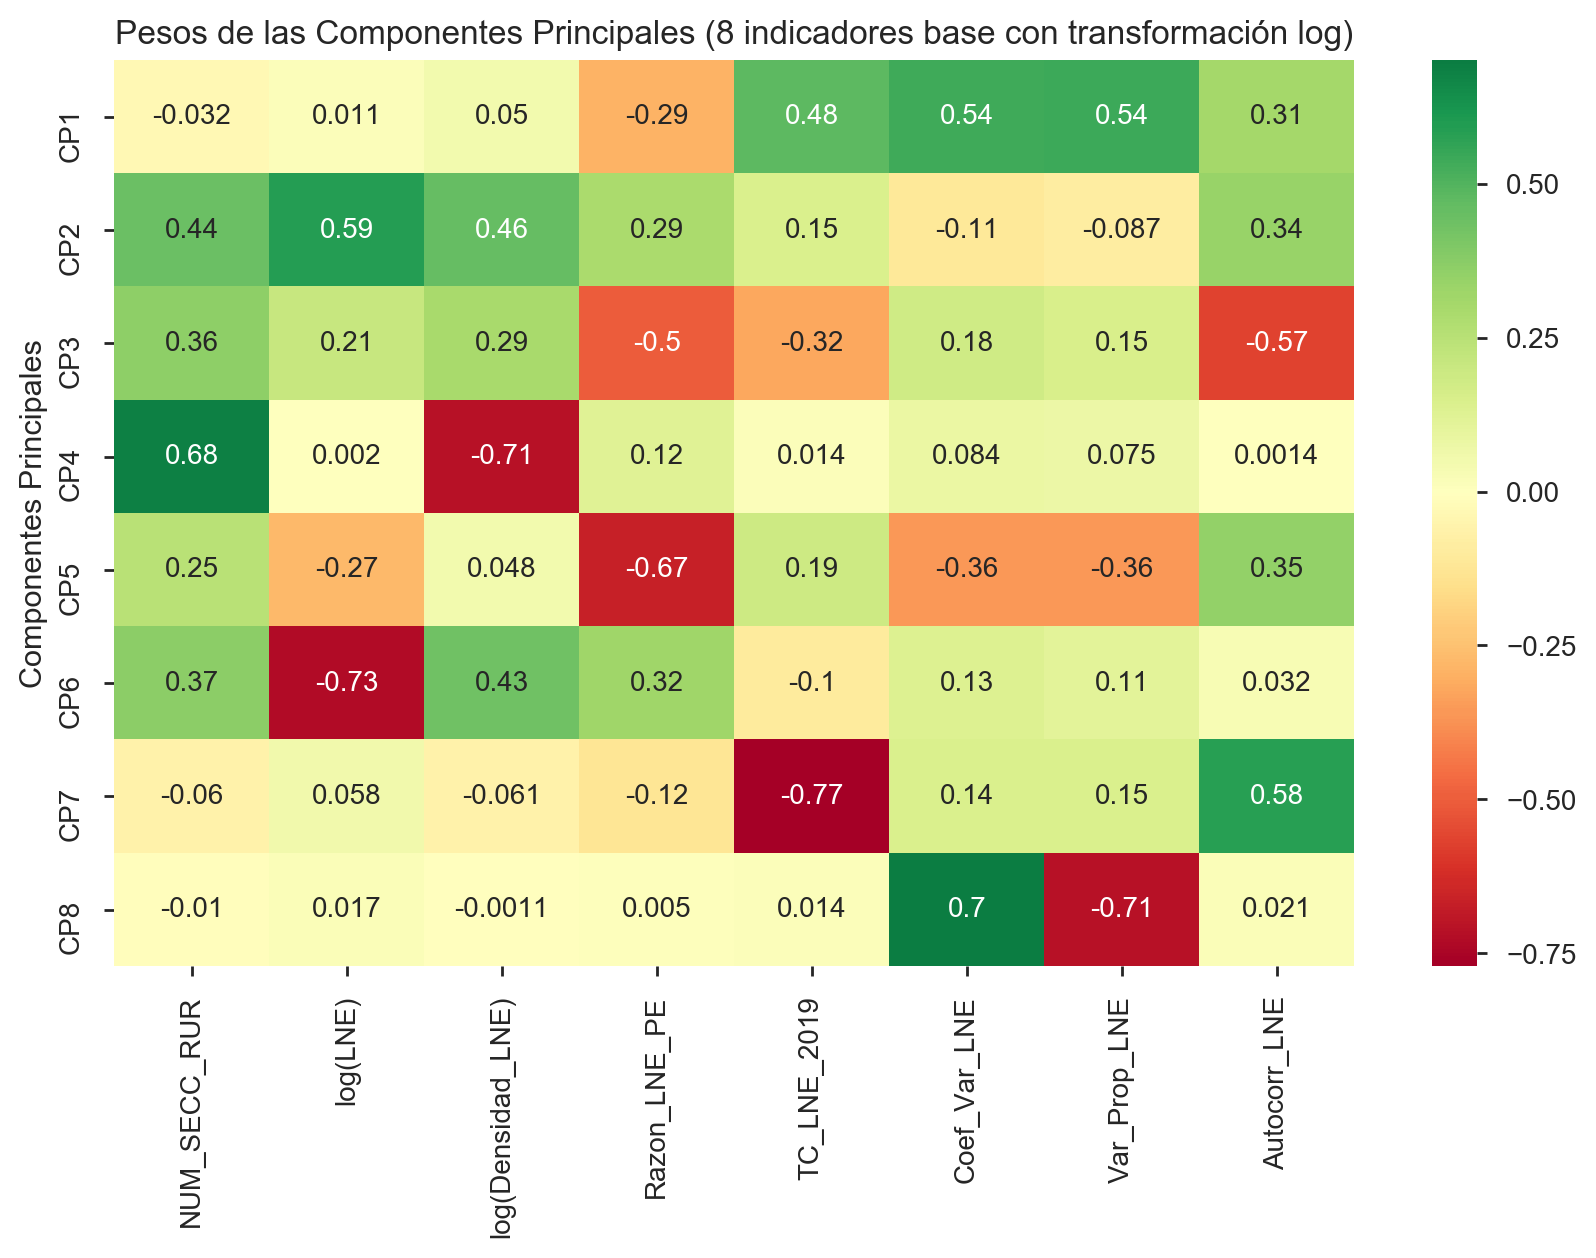

In [37]:
plt.figure(figsize=(10,6), dpi= 200)
sns.heatmap(df_pca_pesos_ind8_tf, cmap='RdYlGn', center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz (see https://github.com/mwaskom/seaborn/issues/1773)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Pesos de las Componentes Principales (8 indicadores base con transformación log)')

plt.savefig('Pyplot_PCA_heatmap_ind8_tf.png',dpi=600,bbox_inches="tight")
plt.show() 

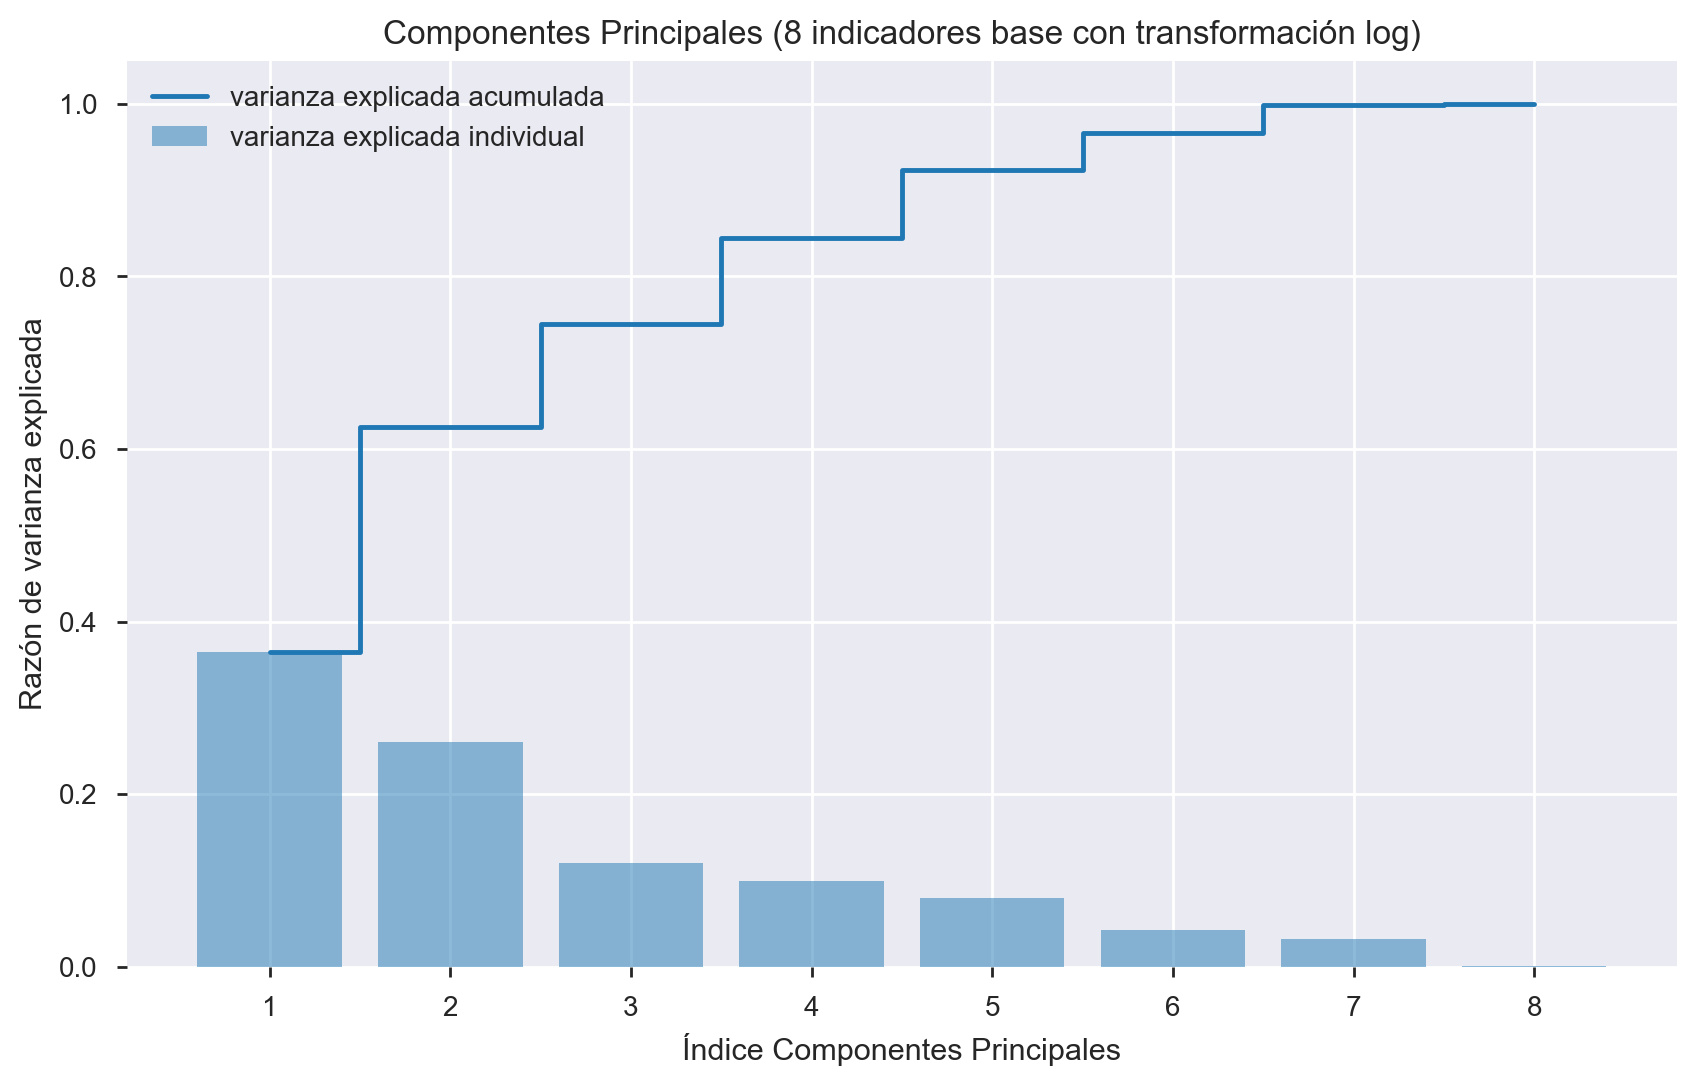

In [38]:

#calculo de la matriz de covarianza y sus correspondientes eigenvalores y eigenvectores
cov_mat = np.cov(x3.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# calculate of individual and cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.figure(figsize=(10,6), dpi= 200)
plt.bar(range(1,9), var_exp, alpha=0.5,
        align='center', label='varianza explicada individual')
plt.step(range(1,9), cum_var_exp, where='mid',
         label='varianza explicada acumulada')
plt.ylabel('Razón de varianza explicada')
plt.xlabel('Índice Componentes Principales')
plt.legend(loc='best')
plt.title('Componentes Principales (8 indicadores base con transformación log)')

plt.savefig('Pyplot_PCA_variance_ind8_tf.png',dpi=600)
plt.show()

In [39]:
#concatenamos los resultados con los metadatos
df_pca_results_ind8_tf = pd.concat([metadatos[labels], df_pca_ind8_tf], axis = 1)
df_pca_results_ind8_tf.head()
#salvar resultados PCA
df_pca_results_ind8_tf.to_csv(r'Resultados_Mun_PCA_ind8_tf.csv', index = None)

### Proyección de los municipios en el espacio de Componentes Principales (8 indicadores con transformación log)
Gráfica en el espacio CP1, CP2

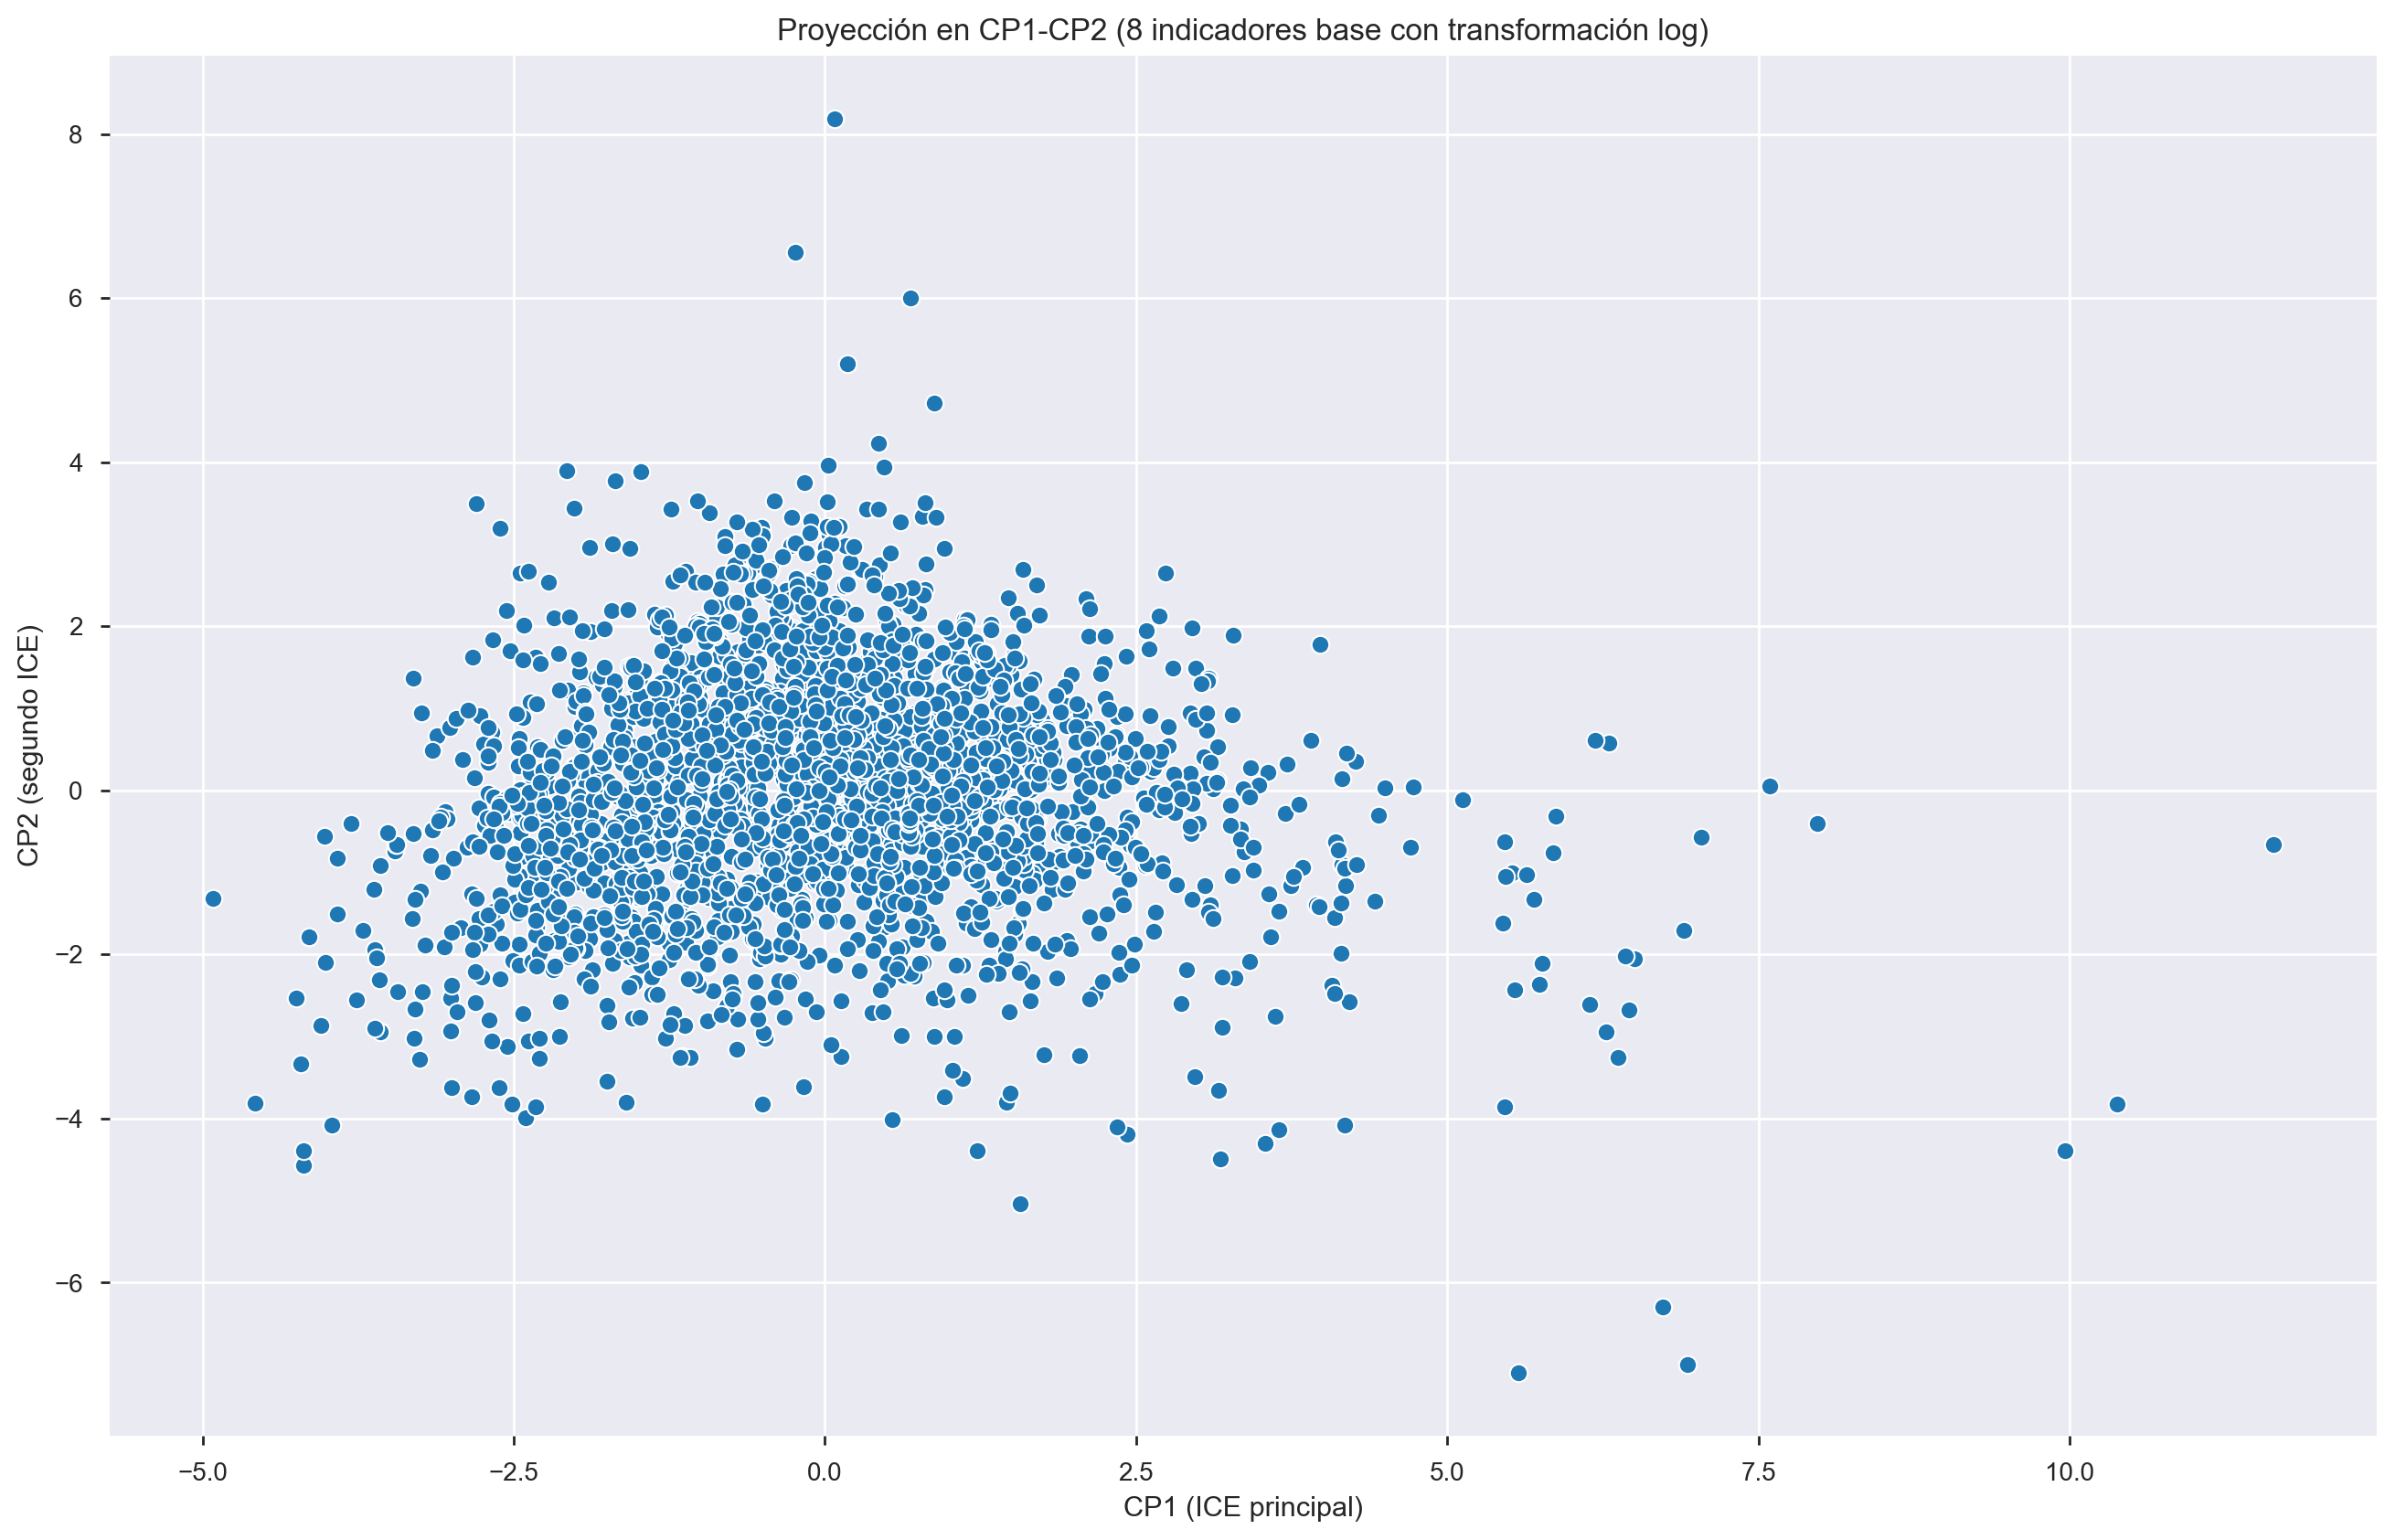

In [40]:
#Scatter plot (seaborn) PC1 vs PC2

plt.figure(figsize=(16, 10), dpi= 200, facecolor='w', edgecolor='k')
sns.scatterplot(x="CP1", y="CP2", 
                data=df_pca_results_ind8_tf)
# Set x-axis label
plt.xlabel('CP1 (ICE principal)')
# Set y-axis label
plt.ylabel('CP2 (segundo ICE)')
plt.title('Proyección en CP1-CP2 (8 indicadores base con transformación log)')

plt.savefig('Pyplot_PCA_projection_ind8_tf.png',dpi=600)

Gráfica en el espacio CP1, CP2, CP3

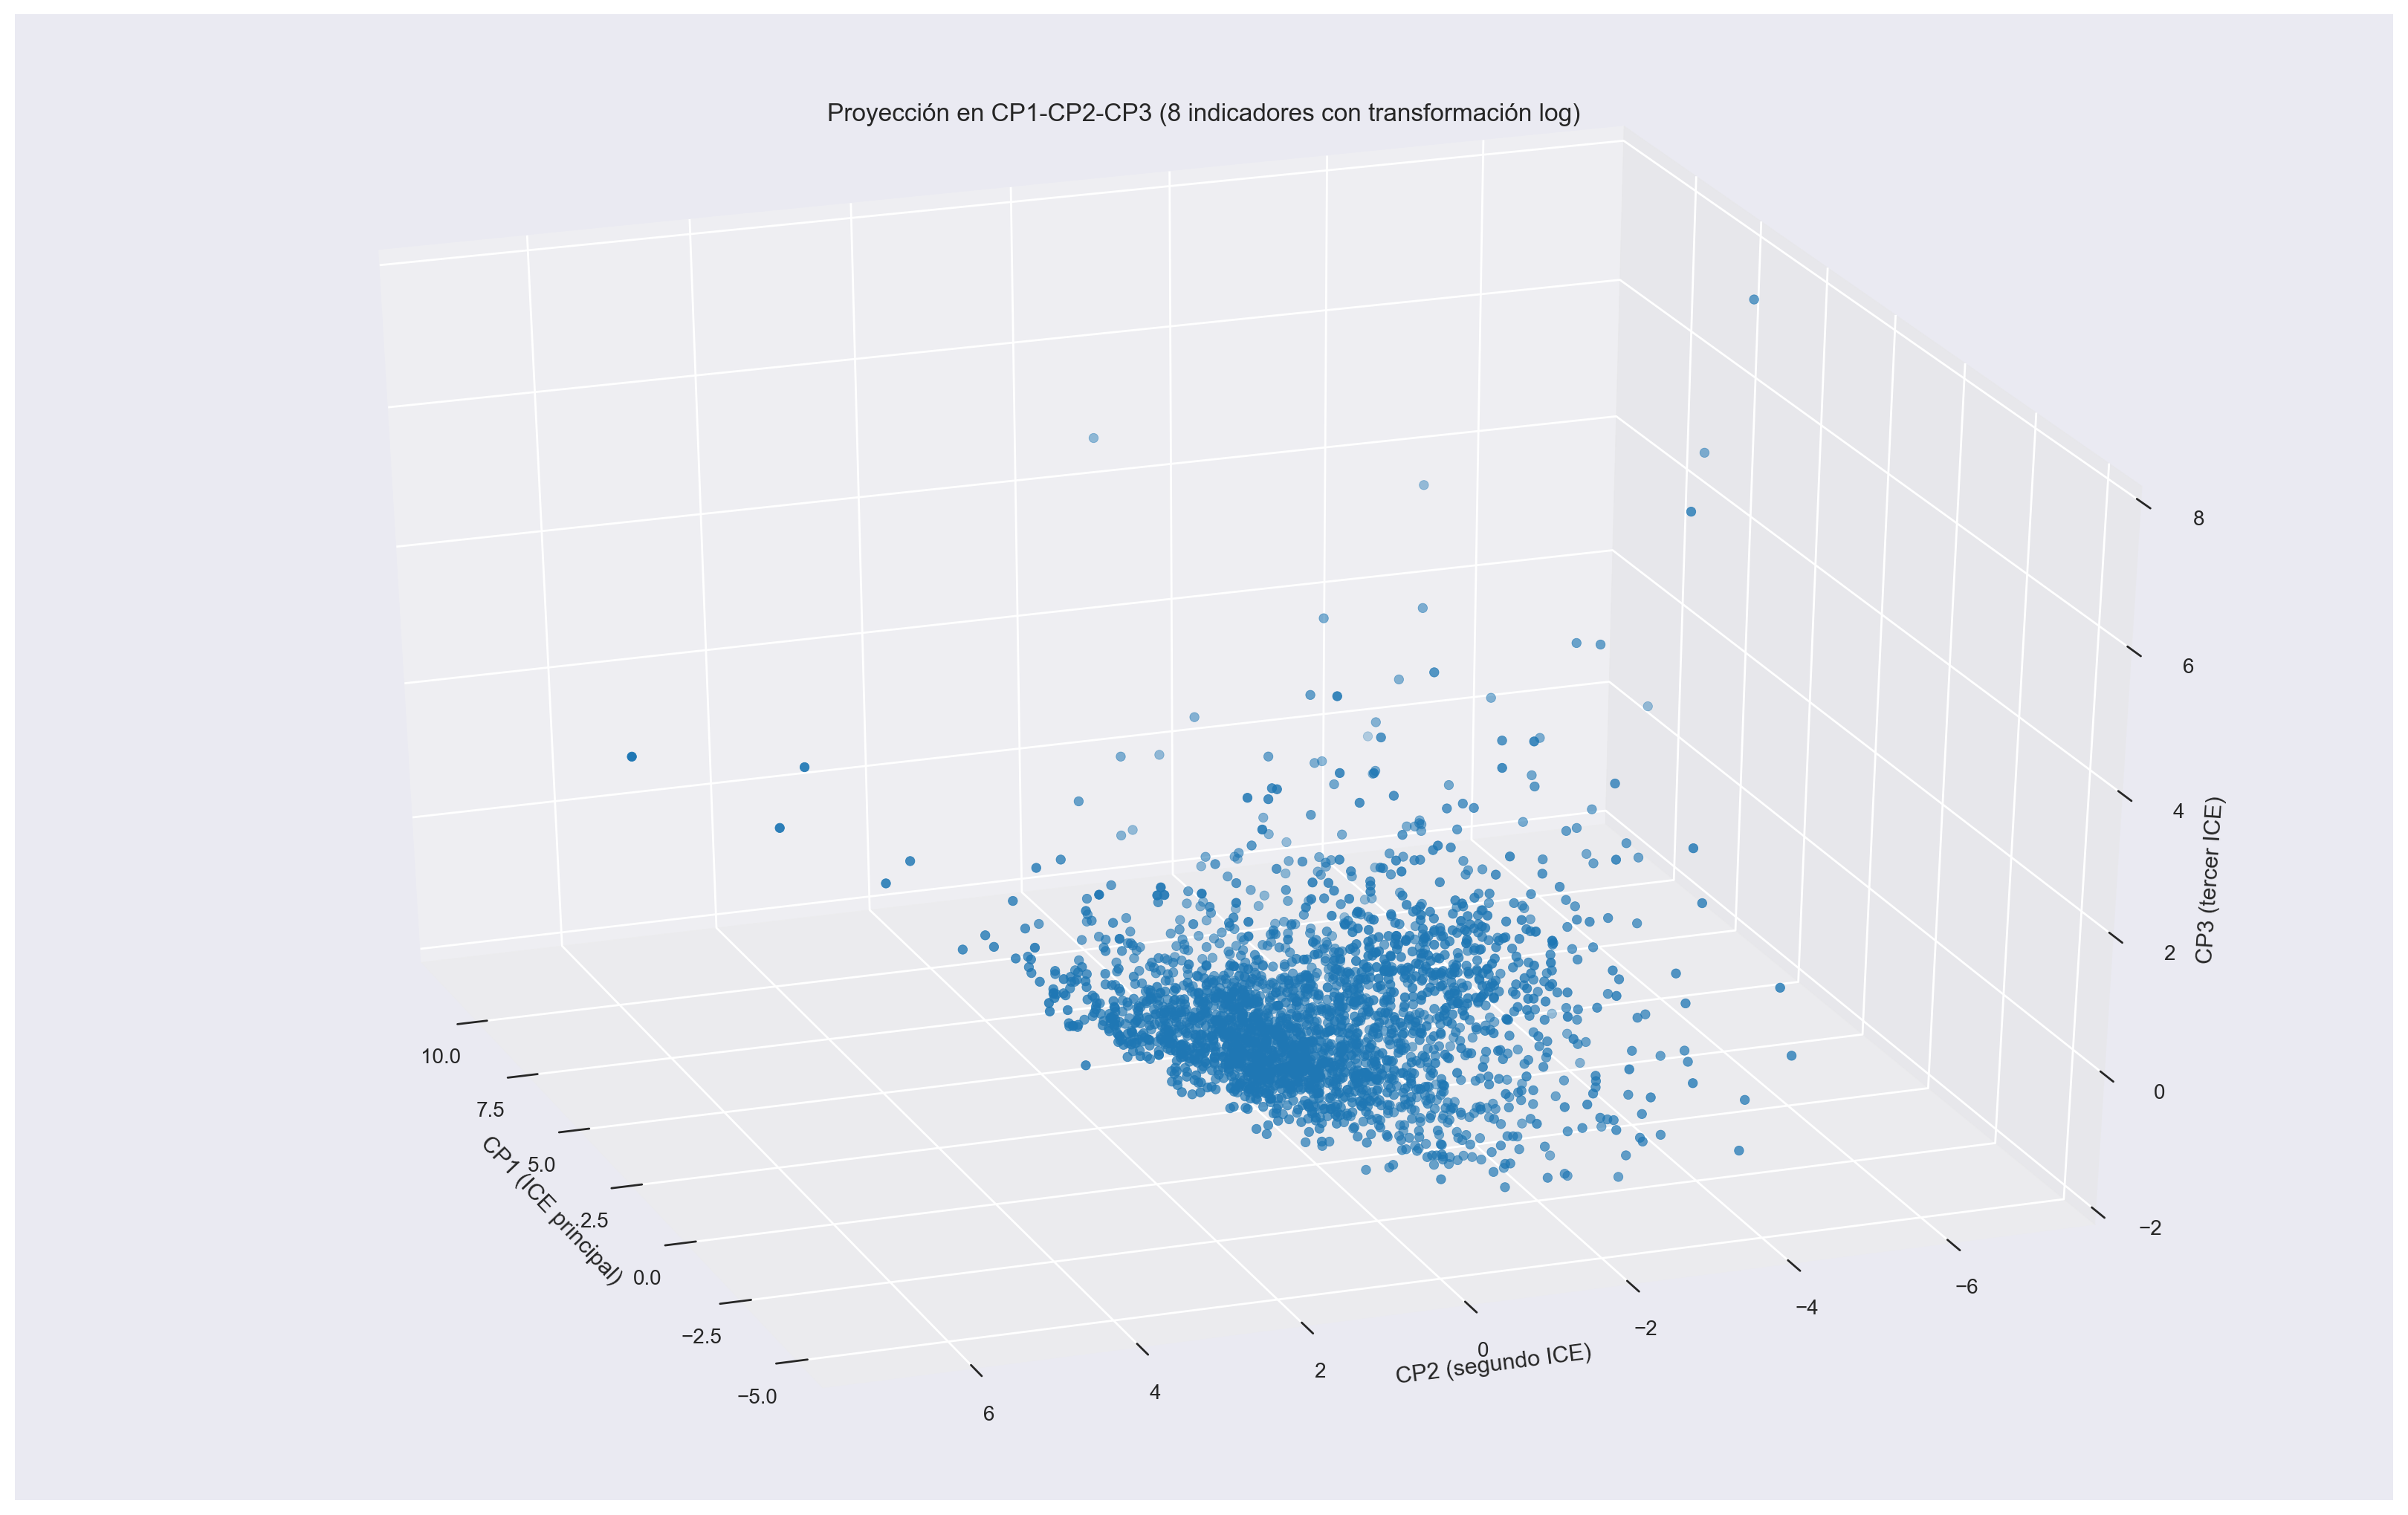

In [41]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

fig = pyplot.figure(figsize=(16, 10), dpi=200, facecolor='w', edgecolor='k')
ax = Axes3D(fig)
ax.scatter(df_pca_results_ind8_tf['CP1'], df_pca_results_ind8_tf['CP2'], df_pca_results_ind8_tf['CP3'],s=20)
# ax.set_xlim3d(-10, 40)
ax.set_ylim3d(-7.5,7.5)
ax.set_zlim3d(-2,8)
ax.set_xlabel('CP1 (ICE principal)')
ax.set_ylabel('CP2 (segundo ICE)')
ax.set_zlabel('CP3 (tercer ICE)')
elev = 30.0
azim = 160.0
ax.view_init(elev, azim)
ax.set_title('Proyección en CP1-CP2-CP3 (8 indicadores con transformación log)')

plt.savefig('Pyplot_PCA_3dprojection_ind8_tf.png',dpi=600)
pyplot.show()

Gráfica 3d animada

In [42]:
# import plotly.express as px

# fig = px.scatter_3d(df_pca_results_ind8_tf, 
#                     x='CP1', 
#                     y='CP2', 
#                     z='CP3')
# fig.update_layout(scene = dict(
#                     xaxis_title='CP1 (ICE principal)',
#                     yaxis_title='CP2 (segundo ICE)',
#                     zaxis_title='CP3 (tercer ICE)'),
#                  legend_orientation="h")
# fig.show()

<br>

## Referencias
- https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
- https://plot.ly/python/v3/ipython-notebooks/principal-component-analysis/#pca-vs-lda
- https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python
- https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
- https://alexanderfabisch.github.io/t-sne-in-scikit-learn.html
- https://medium.com/@indreshbhattacharyya/feature-selection-categorical-feature-selection-boruta-light-gbm-chi-square-bf47e94e2558
- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
- https://stackoverflow.com/questions/52472757/creating-a-boxplot-facetgrid-in-seaborn-for-python
- https://www.kdnuggets.com/2019/07/10-simple-hacks-speed-data-analysis-python.html
- https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet